# Emotion Detection from Text: Leveraging Machine Learning for Enhanced Customer Insight

## Problem Statement

- In today's digitally connected world, businesses and organizations face a challenge in understanding and interpreting the diverse emotions expressed by their customers through textual data. 
- Traditional customer-to-business interactions have evolved from physical complaints and calls to online platforms such as social media, website reviews, emails, and surveys. 
- To gain deeper insights into customer sentiments, this project aims to develop an advanced emotion detection system using machine learning technology, specifically focusing on accurately categorizing emotions in textual data with a focus on common emotions like 'empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise', 'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger`.

## Research Aims & Objectives

### Aims:
- Develop an effective emotion detection system using sentiment analysis.
- Push the boundaries of existing sentiment analysis (usually positive vs negative sentiments) technologies to detect and interpret actual emotions more accurately and comprehensively.

### Objectives:
1. Leverage machine learning technology to train the model for accurate emotion detection and categorization in text.
2. Evaluate the trained model's accuracy, recall, and precision across various textual forms and languages.
3. List and compare machine learning algorithms for sentiment analysis, including their advantages and disadvantages.

## Solution & Expected Results
- The proposed solution involves the development of an emotion detection system with features including text pre-processing, emotion classification, real-time analysis, and adaptive learning. 
- The choice of models, Long Short-Term Memory (LSTM) and Bidirectional Encoder Representations from Transformers (BERT), is based on their ability to retain contextual information in textual data.

## Dataset

- The project will utilize a diverse dataset containing textual data expressing various emotions. 
- The dataset will be preprocessed and split into training and testing sets to facilitate model training and evaluation.
- The dataset we will use for this project is from kaggle. The datset had 40k features of conversation. The dataset contains emotions like: `'empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise', 'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger`.

## Emotion Detection System Features

The developed system will include the following features:
1. **Text Pre-processing**: Involving data cleaning, tokenization, and feature extraction from raw data.
2. **Emotion Classification**: Allowing the system to categorize different sets of emotions in textual data.
3. **Real-time Analysis**: Essential for user support interactions where users receive instantaneous responses matching their emotions.
4. **Adaptive Learning**: Allowing the detection system to continuously improve its accuracy when fed new data.

By addressing these aspects, the project aims to revolutionize customer experience, decision-making processes, and contribute to various fields such as psychology, customer service, and marketing.





- 


### Libraries Importation

In [1]:
!pip install contractions
import os, sys, seaborn as sns, matplotlib.pyplot as plt, nltk, re, warnings, contractions
import pandas as pd
import numpy as np


from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,accuracy_score, precision_score, 
    recall_score, f1_score, auc, roc_auc_score, roc_curve,
    confusion_matrix
)

import tensorflow as tf
import keras.backend as K
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (
    Dense, Input, GlobalMaxPool1D, Dropout, Embedding, Input, LSTM, Dropout, Conv1D,Reshape, Permute, Lambda, Flatten
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.layers import RepeatVector, multiply
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from transformers import AutoTokenizer, TFBertModel
from tensorflow.keras.utils import plot_model

warnings.filterwarnings("ignore")
sns.set(style='white')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 7.1 MB/s eta 0:00:00


2024-02-04 08:13:28.860379: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-04 08:13:28.860470: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-04 08:13:29.020269: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import string

In [3]:
# get the stopwords
nltk.download('stopwords')
ALL_STOPWORDS = list(set(nltk.corpus.stopwords.words('english')))


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# in order to get same results always set seed
np.random.seed = 2024
os.environ['PYTHONHASHSEED'] = str(2024)


## Read the data

In [5]:
# read the dataset
train = pd.read_csv('/kaggle/input/emotions-dataset-for-nlp/train.txt', names=['Text', 'Emotion'], sep=';')
val = pd.read_csv('/kaggle/input/emotions-dataset-for-nlp/val.txt', names=['Text', 'Emotion'], sep=';')
test = pd.read_csv('/kaggle/input/emotions-dataset-for-nlp/test.txt', names=['Text', 'Emotion'], sep=';')


In [6]:
train.shape, val.shape, test.shape

((16000, 2), (2000, 2), (2000, 2))

In [7]:
# check top 5
train.head()

Text  Emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger

In [8]:
# check bottom 5
train.tail()

Text  Emotion
15995  i just had a very brief time in the beanbag an...  sadness
15996  i am now turning and i feel pathetic that i am...  sadness
15997                     i feel strong and good overall      joy
15998  i feel like this was such a rude comment and i...    anger
15999  i know a lot but i feel so stupid because i ca...  sadness

In [9]:
# number of recoirds we have
train.shape

(16000, 2)

In [10]:
# data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     16000 non-null  object
 1   Emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [11]:
# data summary
train.describe(include='object').T

count unique                                                top  freq
Text     16000  15969  im still not sure why reilly feels the need to...     2
Emotion  16000      6                                                joy  5362

In [12]:
# check the available emotions
train['Emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [13]:
LEMMATIZER = WordNetLemmatizer()

In [14]:
# LEMMATIZER.lemmatize("flying")

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- Since this dataset is tweet data, it is likely to contain many items not needed likle mentions, hashtags, numbers, links etc. These are going to be removed by textual cleaning 
- Proceeding further without cleaned all the above mentioned points might mislead the analysis
- Also, will use lemmatizer for now as the words should have some meaning while analyzing

In [16]:
import string
# function to perfom cleaning
def preprocess_text(input_text):
    """
    Preprocesses the input text to clean and normalize it for sentiment analysis.

    Parameters:
    - input_text (str): The raw text to be preprocessed.

    Returns:
    - str: The cleaned and preprocessed text.
    """
    # Replace contractions
    cleaned_text = contractions.fix(input_text)
    
    # Remove digits
    cleaned_text = ' '.join([word if not word.isdigit() else '' for word in cleaned_text.split()])

    # Replace multiple dots with a single dot and remove repeated dots
    cleaned_text = re.sub(r'\.+', '.', cleaned_text)
    cleaned_text = re.sub(r'\.\s+\.', '', cleaned_text)

    # Replace dots with a space if there is no space between the words
    cleaned_text = re.sub(r'\.(\S)', r' \1', cleaned_text)

    # Remove extra spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text.strip())

    # Remove emails, words starting with @ and #
    cleaned_text = re.sub('([A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,})', '', cleaned_text)
    cleaned_text = re.sub(r'(?i)\b@\w\w+\b', '', cleaned_text)
    cleaned_text = re.sub(r'(?i)\b#\w\w+\b', '', cleaned_text)
    cleaned_text = re.sub(r'\b\d+\S*\b', '', cleaned_text)
    
    # Reduce consecutive repeating characters to two
    cleaned_text = re.sub(r'(.)\1{2,}', r'\1\1', cleaned_text)

    # Remove account tags, hashtags, and links
    cleaned_text = re.sub(r'@[\w]+', '', cleaned_text)
    cleaned_text = re.sub(r'#[\w]+', '', cleaned_text)
    cleaned_text = re.sub(r'http[^\s]+', '', cleaned_text)

    # Convert to lowercase and lemmatize
    cleaned_text = [char.lower() for char in cleaned_text if char not in string.punctuation]
    cleaned_text = ''.join(cleaned_text)
    #longer words with more than 25 characters are removed  #LEMMATIZER.lemmatize(word)
    cleaned_text = ' '.join([word for word in cleaned_text.split() if len(word) <= 25])

    return cleaned_text


In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
# apply the function above and create a new column with cleaned
train['text'] = train['Text'].apply(preprocess_text)
test['text'] = test['Text'].apply(preprocess_text)
val['text'] = val['Text'].apply(preprocess_text)

In [19]:
train.head()

Text  Emotion  \
0                            i didnt feel humiliated  sadness   
1  i can go from feeling so hopeless to so damned...  sadness   
2   im grabbing a minute to post i feel greedy wrong    anger   
3  i am ever feeling nostalgic about the fireplac...     love   
4                               i am feeling grouchy    anger   

                                                text  
0                          i did not feel humiliated  
1  i can go from feeling so hopeless to so damned...  
2  i am grabbing a minute to post i feel greedy w...  
3  i am ever feeling nostalgic about the fireplac...  
4                               i am feeling grouchy

In [20]:
emotion = pd.DataFrame(train['Emotion'].value_counts())
emotion

count
Emotion        
joy        5362
sadness    4666
anger      2159
fear       1937
love       1304
surprise    572

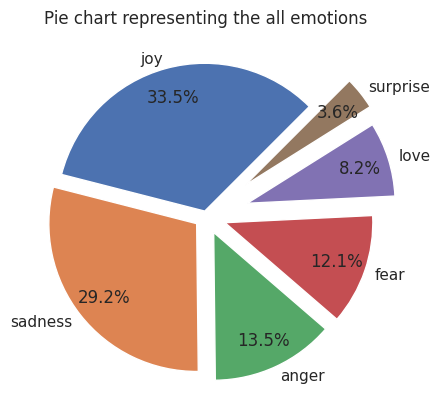

In [21]:
explode = np.array(train['Emotion'].value_counts())/len(train)
explode = list(explode)[::-1]

plt.pie(emotion['count'], startangle=45, pctdistance = 0.8, explode = explode, 
        autopct = '%1.1f%%', labels = list(emotion.index), labeldistance=1.07, )
plt.title('Pie chart representing the all emotions')
plt.show()

- As it is seen, there are 6 classes and some of them are having very few examples. (i.e. Anger, Boredom, Empty etc...). 

In [22]:
test.head()

Text  Emotion  \
0  im feeling rather rotten so im not very ambiti...  sadness   
1          im updating my blog because i feel shitty  sadness   
2  i never make her separate from me because i do...  sadness   
3  i left with my bouquet of red and yellow tulip...      joy   
4    i was feeling a little vain when i did this one  sadness   

                                                text  
0  i am feeling rather rotten so i am not very am...  
1        i am updating my blog because i feel shitty  
2  i never make her separate from me because i do...  
3  i left with my bouquet of red and yellow tulip...  
4    i was feeling a little vain when i did this one

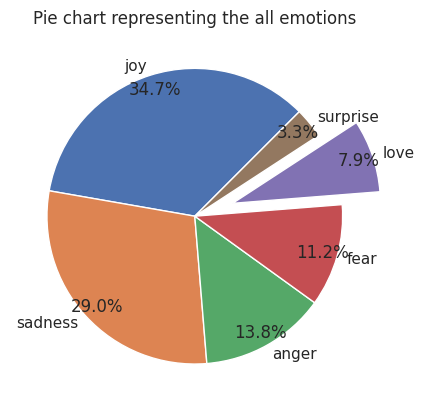

In [23]:
explode = [0, 0, 0, 0, 0.27,0]
new_emotion = pd.DataFrame(test['Emotion'].value_counts())
plt.pie(new_emotion["count"], startangle=45, pctdistance = 0.9, explode = explode, 
        autopct = '%1.1f%%', labels = list(new_emotion.index), labeldistance=1.07, )
plt.title('Pie chart representing the all emotions')
plt.show()

In [24]:
test.head()

Text  Emotion  \
0  im feeling rather rotten so im not very ambiti...  sadness   
1          im updating my blog because i feel shitty  sadness   
2  i never make her separate from me because i do...  sadness   
3  i left with my bouquet of red and yellow tulip...      joy   
4    i was feeling a little vain when i did this one  sadness   

                                                text  
0  i am feeling rather rotten so i am not very am...  
1        i am updating my blog because i feel shitty  
2  i never make her separate from me because i do...  
3  i left with my bouquet of red and yellow tulip...  
4    i was feeling a little vain when i did this one

In [25]:
df = train.copy()


In [26]:
# check duplicates
df.duplicated().sum()

1

- There are alot of rows which are duplicated but we need to check also if there are rows having the same text but different emotions

In [27]:
#removing duplicated values
# do the same for test and val
def drop_duplicates(data):    
    index_duplicated = data[data.duplicated() == True].index
    data.drop(index_duplicated, axis = 0, inplace = True)
    data.reset_index(inplace=True, drop = True)
    return data

train = drop_duplicates(train)
val = drop_duplicates(val)
test = drop_duplicates(test)

In [28]:
# get duplication by text column
train[train['text'].duplicated() == True].sort_values("text", ascending=False)[:20]

Text   Emotion  \
11354  i write these words i feel sweet baby kicks fr...      love   
15314  i will feel as though i am accepted by as well...       joy   
11273  i was so stubborn and that it took you getting...       joy   
15875  i was sitting in the corner stewing in my own ...     anger   
7623   i was intensely conscious of how much cash i h...   sadness   
6563   i tend to stop breathing when i m feeling stre...     anger   
12441                   i still feel completely accepted      love   
6133               i still feel a craving for sweet food      love   
15328  i shy away from songs that talk about how i fe...       joy   
14925  i resorted to yesterday the post peak day of i...      fear   
9769   i often find myself feeling assaulted by a mul...   sadness   
11823  i have chose for myself that makes me feel ama...       joy   
9596   ive also made it with both sugar measurements ...       joy   
9687   i had to choose the sleek and smoother feel of...       joy   
12562                           i feel so weird about it  surprise   
14633  i feel pretty weird blogging about deodorant b...      fear   
10117  i feel pretty tortured because i work a job an...      fear   
5067   i feel on the verge of tears from weariness i ...       joy   
10581                       i feel most passionate about       joy   
13879  i feel like i am very passionate about youtube...      love   

                                                    text  
11354  i write these words i feel sweet baby kicks fr...  
15314  i will feel as though i am accepted by as well...  
11273  i was so stubborn and that it took you getting...  
15875  i was sitting in the corner stewing in my own ...  
7623   i was intensely conscious of how much cash i h...  
6563   i tend to stop breathing when i m feeling stre...  
12441                   i still feel completely accepted  
6133               i still feel a craving for sweet food  
15328  i shy away from songs that talk about how i fe...  
14925  i resorted to yesterday the post peak day of i...  
9769   i often find myself feeling assaulted by a mul...  
11823  i have chose for myself that makes me feel ama...  
9596   i have also made it with both sugar measuremen...  
9687   i had to choose the sleek and smoother feel of...  
12562                           i feel so weird about it  
14633  i feel pretty weird blogging about deodorant b...  
10117  i feel pretty tortured because i work a job an...  
5067   i feel on the verge of tears from weariness i ...  
10581                       i feel most passionate about  
13879  i feel like i am very passionate about youtube...

- We can see that almost all of them have different labels.
- These records are all going to be removed as they might confuse the model

In [29]:
val.columns

Index(['Text', 'Emotion', 'text'], dtype='object')

In [30]:
#removing duplicated text 
def remove_duplicate_text(data):
    index_duplicate_by_text = data[data['text'].duplicated() == True].index
    data.drop(index_duplicate_by_text, axis = 0, inplace = True)
    data.reset_index(inplace=True, drop = True)
    
    return data
    
train = remove_duplicate_text(train)
val = remove_duplicate_text(val)
test = remove_duplicate_text(test)

### WORD COUNT CHECK
- Ensure that the sentences are atleast 6 words long in order to express emotions well

In [31]:
# count the number which are below
(train['text'].str.split().apply(len)< 3).sum()

8

- We have about 8 records.
- There are going to be removed

In [32]:
train[(train['text'].str.split().apply(len)< 3) == True].head(10)

Text  Emotion             text
4150       earth crake     fear      earth crake
4997   during lectures      joy  during lectures
8818         in sweden     fear        in sweden
9349       no response    anger      no response
12187        one night      joy        one night
12528        at school    anger        at school
12782          one day  sadness          one day
13295   no description    anger   no description

In [33]:

# drop them
def drop_less_word_counts(data):
    data.drop(data[(data['text'].str.split().apply(len)< 3) == True].index, axis = 0, inplace = True)
    data.reset_index(inplace=True, drop = True)
    return data

train = drop_less_word_counts(train)
val = drop_less_word_counts(val)
test = drop_less_word_counts(test)

In [34]:
# check the remaining data
train.shape

(15959, 3)

In [35]:
# sample
train.head()

Text  Emotion  \
0                            i didnt feel humiliated  sadness   
1  i can go from feeling so hopeless to so damned...  sadness   
2   im grabbing a minute to post i feel greedy wrong    anger   
3  i am ever feeling nostalgic about the fireplac...     love   
4                               i am feeling grouchy    anger   

                                                text  
0                          i did not feel humiliated  
1  i can go from feeling so hopeless to so damned...  
2  i am grabbing a minute to post i feel greedy w...  
3  i am ever feeling nostalgic about the fireplac...  
4                               i am feeling grouchy

In [36]:
#Count the number of stopwords in the data
temp =train.copy()
temp['stop_words'] = temp['text'].apply(lambda x: len(set(x.split()) & set(ALL_STOPWORDS)))
temp.stop_words.value_counts()

stop_words
7     1402
5     1392
6     1340
8     1329
4     1282
3     1219
9     1166
10    1127
11     907
12     832
2      817
13     690
14     555
15     414
16     308
1      286
17     266
18     212
19     125
20     111
21      72
22      45
23      22
24      15
26       9
25       9
28       3
0        2
29       1
27       1
Name: count, dtype: int64

In [37]:
# check those with over 15 stop words
temp[temp["stop_words"]>15]["text"].str.split().apply(len)

21       44
25       54
42       30
46       64
56       45
         ..
15899    33
15900    57
15938    44
15945    41
15948    57
Name: text, Length: 1199, dtype: int64

- We have alot of stopwords in some sentense, some have more than 15.
- so, we need to take care when we remove them as some rows may become empty

<Axes: title={'center': 'Stopword Distribution'}, ylabel='Frequency'>

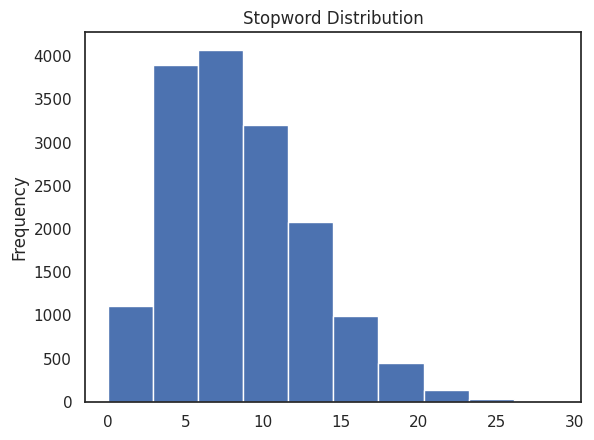

In [38]:
# get the distribution of stopwords
temp['stop_words'].plot(kind= 'hist', title="Stopword Distribution")

In [39]:
temp['char_length'] = temp['text'].apply(lambda x : len(x))
temp['words_length'] = temp['text'].apply(lambda x : len(x.split(" ")))

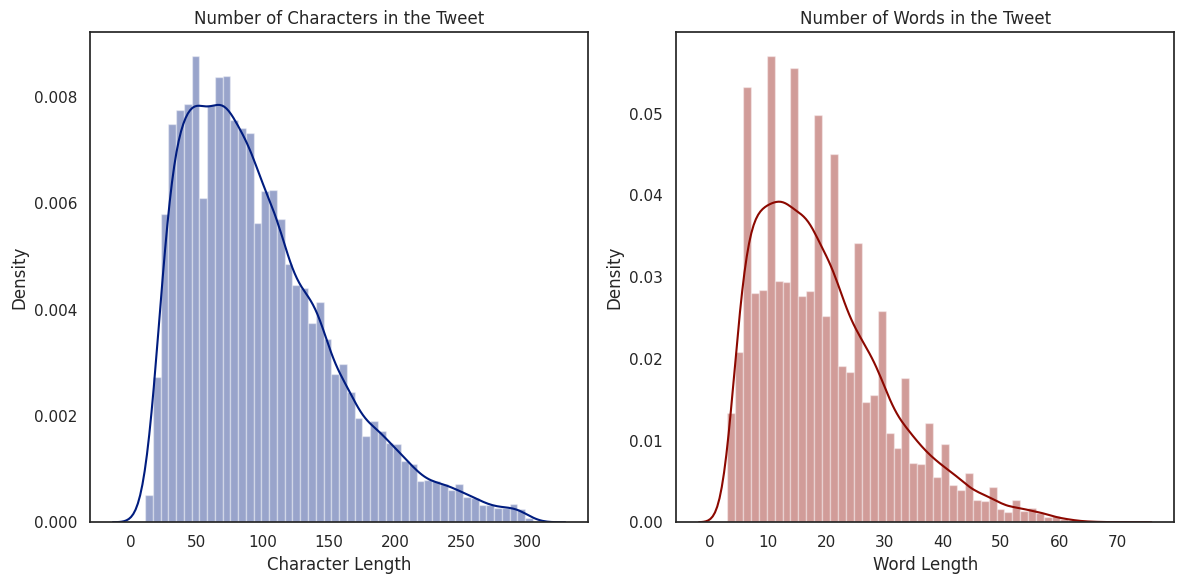

In [40]:
# create the graph for leng
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
color_palette = sns.color_palette("dark")

# Plot the distribution of character lengths
sns.distplot(temp['char_length'], ax=ax1, color=color_palette[0])
ax1.set_title('Number of Characters in the Tweet')
ax1.set_xlabel('Character Length')
ax1.set_ylabel('Density')

# Plot the distribution of word lengths
sns.distplot(temp['words_length'], ax=ax2, color=color_palette[3])
ax2.set_title('Number of Words in the Tweet')
ax2.set_xlabel('Word Length')
ax2.set_ylabel('Density')

# Adjust layout
plt.tight_layout()

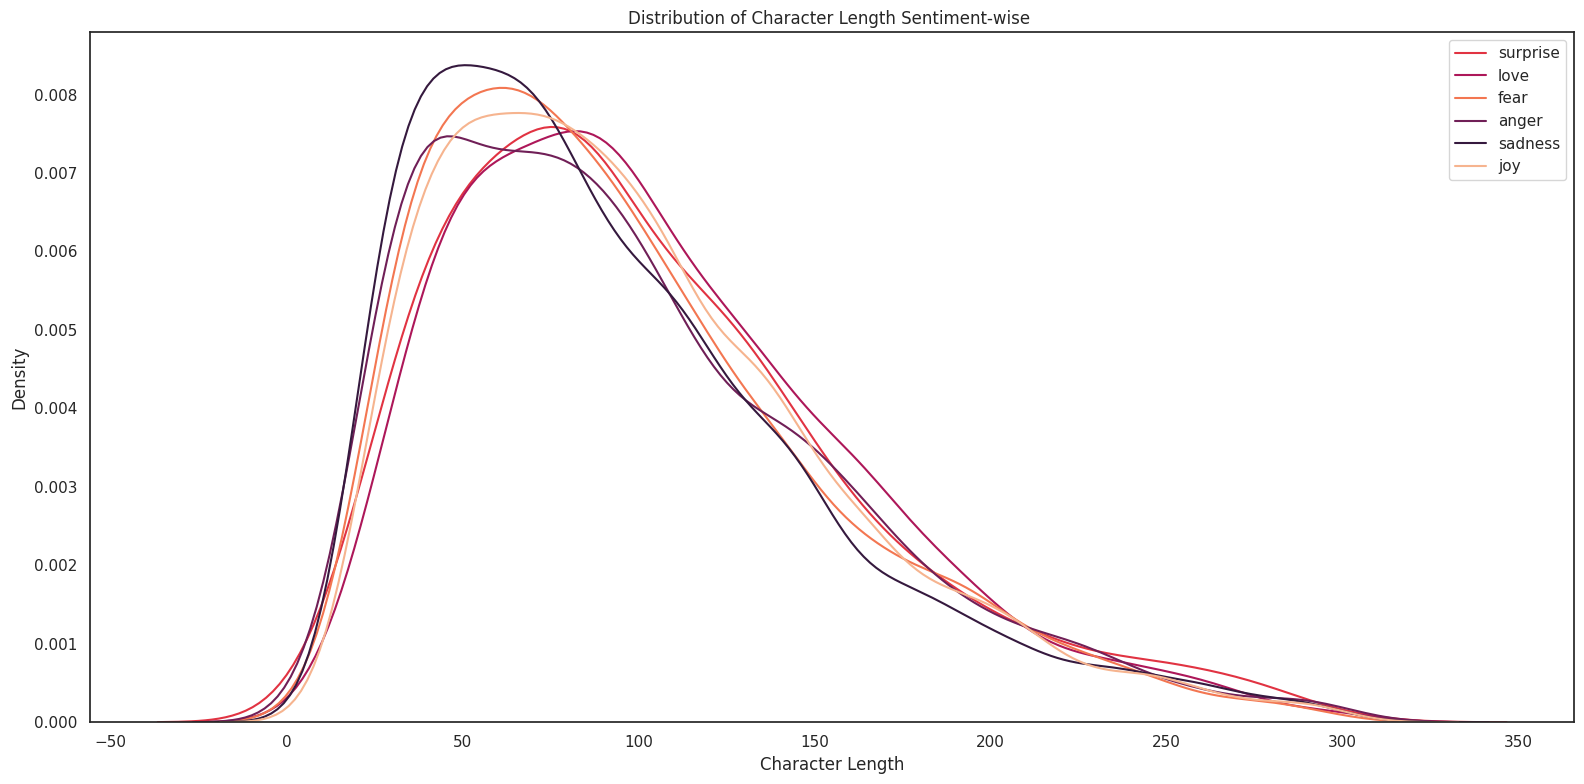

In [41]:
fig, ax = plt.subplots(figsize=(16, 8))
color_palette = sns.color_palette("rocket")

# plot the distribution of character lengths for the  sentiments
for sentiment in temp['Emotion'].value_counts().sort_values().index.tolist():
    sns.kdeplot(temp[temp['Emotion']==sentiment]['char_length'], ax=ax, label=sentiment, color=color_palette[temp['Emotion'].unique().tolist().index(sentiment)])

ax.legend()
ax.set_title("Distribution of Character Length Sentiment-wise ")
ax.set_xlabel('Character Length')
ax.set_ylabel('Density')
plt.tight_layout()

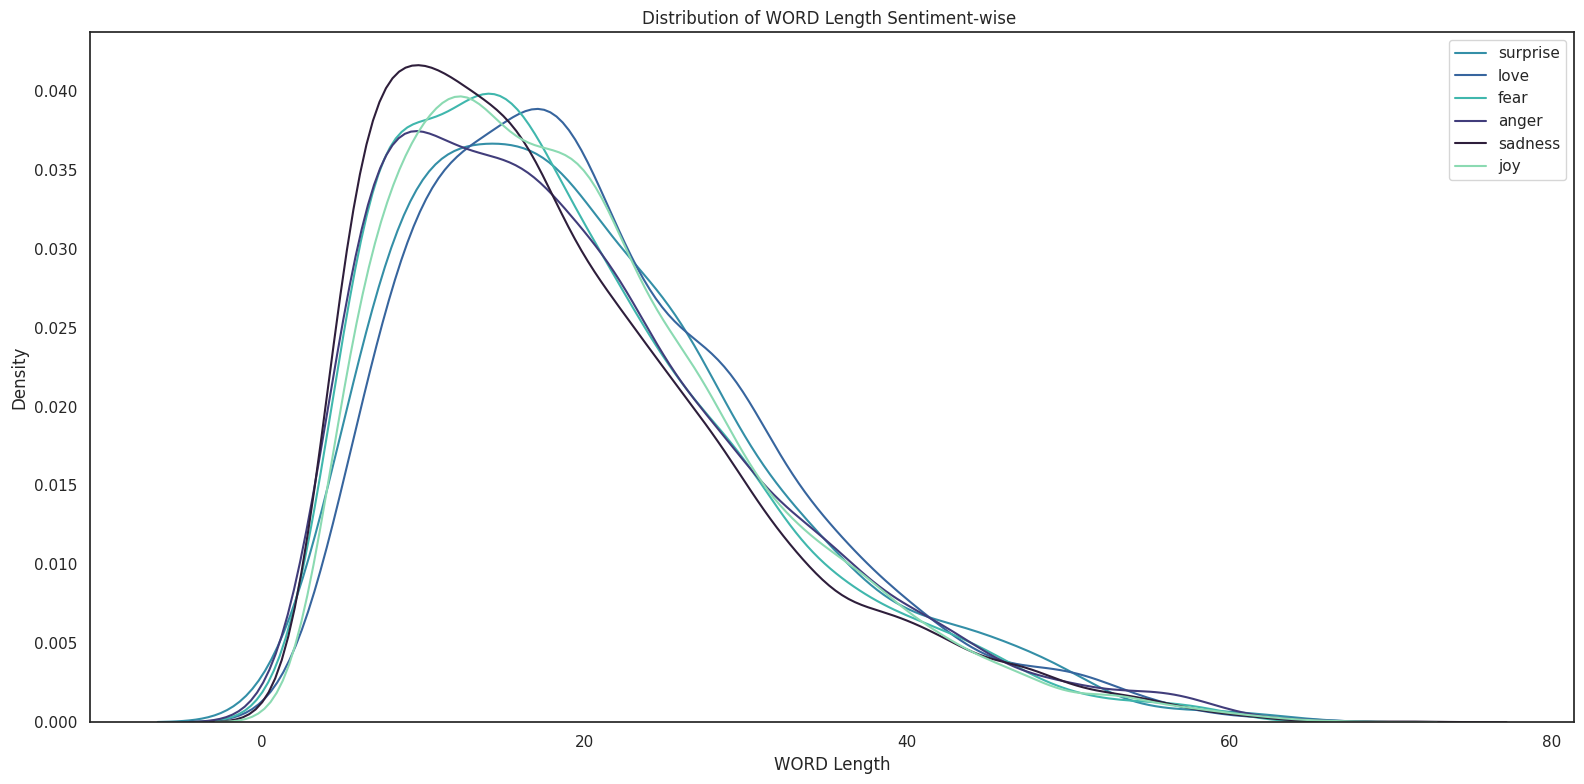

In [42]:
fig, ax = plt.subplots(figsize=(16, 8))
color_palette = sns.color_palette("mako")

# plot the distribution of Word lengths for the  sentiments
for sentiment in temp['Emotion'].value_counts().sort_values().index.tolist():
    sns.kdeplot(temp[temp['Emotion']==sentiment]['words_length'], ax=ax, label=sentiment, color=color_palette[temp['Emotion'].unique().tolist().index(sentiment)])

ax.legend()
ax.set_title("Distribution of WORD Length Sentiment-wise ")
ax.set_xlabel('WORD Length')
ax.set_ylabel('Density')
plt.tight_layout()

In [43]:
# get the average for above two items
length_items_df = temp.groupby('Emotion').agg({'char_length':'mean', 'words_length':'mean'})
length_items_df

char_length  words_length
Emotion                            
anger       97.865242     19.600372
fear        96.915070     19.174003
joy         99.277674     19.803665
love       104.779831     21.013857
sadness     93.323750     18.689337
surprise   102.876761     20.383803

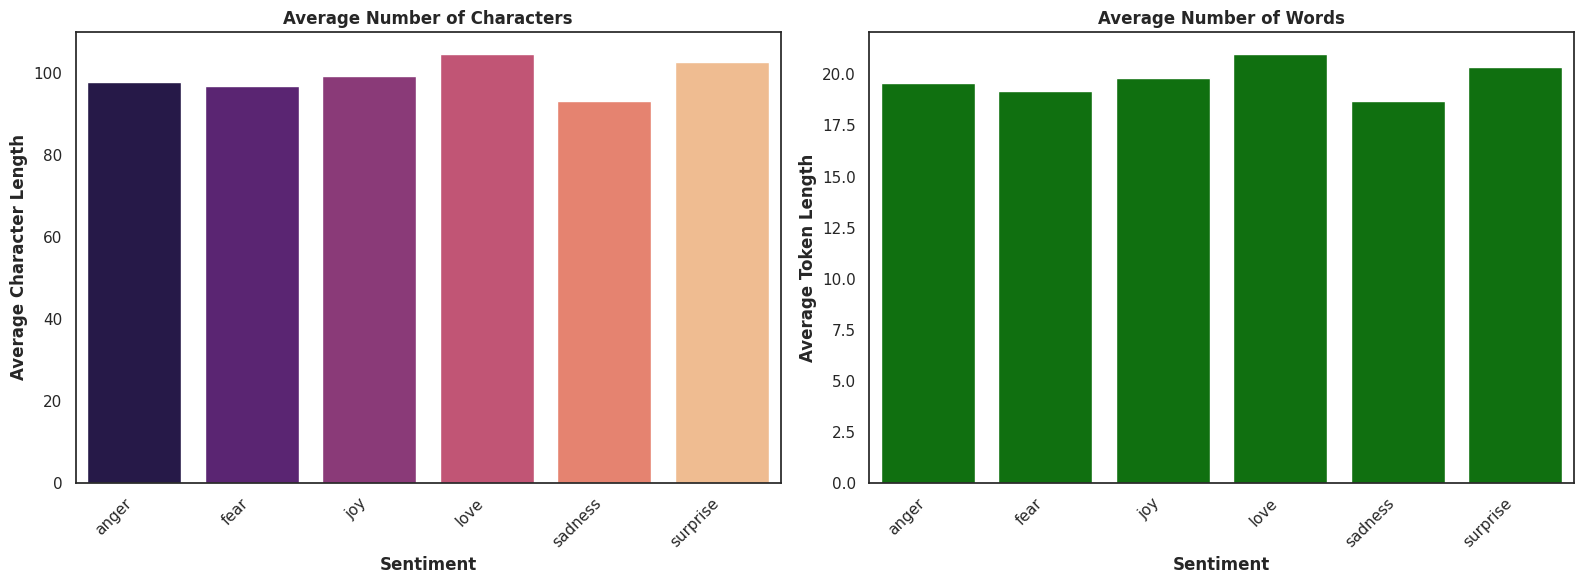

In [44]:
# create a graph for above
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
color_palette = sns.color_palette("magma")

# Plot the average number of characters
sns.barplot(x=length_items_df.index, y=length_items_df['char_length'], ax=ax1, palette=color_palette)
ax1.set_title('Average Number of Characters',fontweight='bold')
ax1.set_xticklabels(length_items_df.index, rotation=45, ha="right")
ax1.set_xlabel('Sentiment',fontweight='bold')
ax1.set_ylabel('Average Character Length',fontweight='bold')

# Plot the average number of words
sns.barplot(x=length_items_df.index, y=length_items_df['words_length'], ax=ax2, color='green')
ax2.set_title('Average Number of Words',fontweight='bold')
ax2.set_xticklabels(length_items_df.index, rotation=45, ha="right")
ax2.set_xlabel('Sentiment',fontweight='bold')
ax2.set_ylabel('Average Token Length',fontweight='bold')
plt.tight_layout()

- From the above, most of them are seen to have almost similar average interms of wordcount and characters counts.
- Neutral has the least in all.
- Also love and happiness (which are positive sentiments) appears to have almost similar average while the rest ie sadness, worry and other (which are negative sentiments) have almost similar.


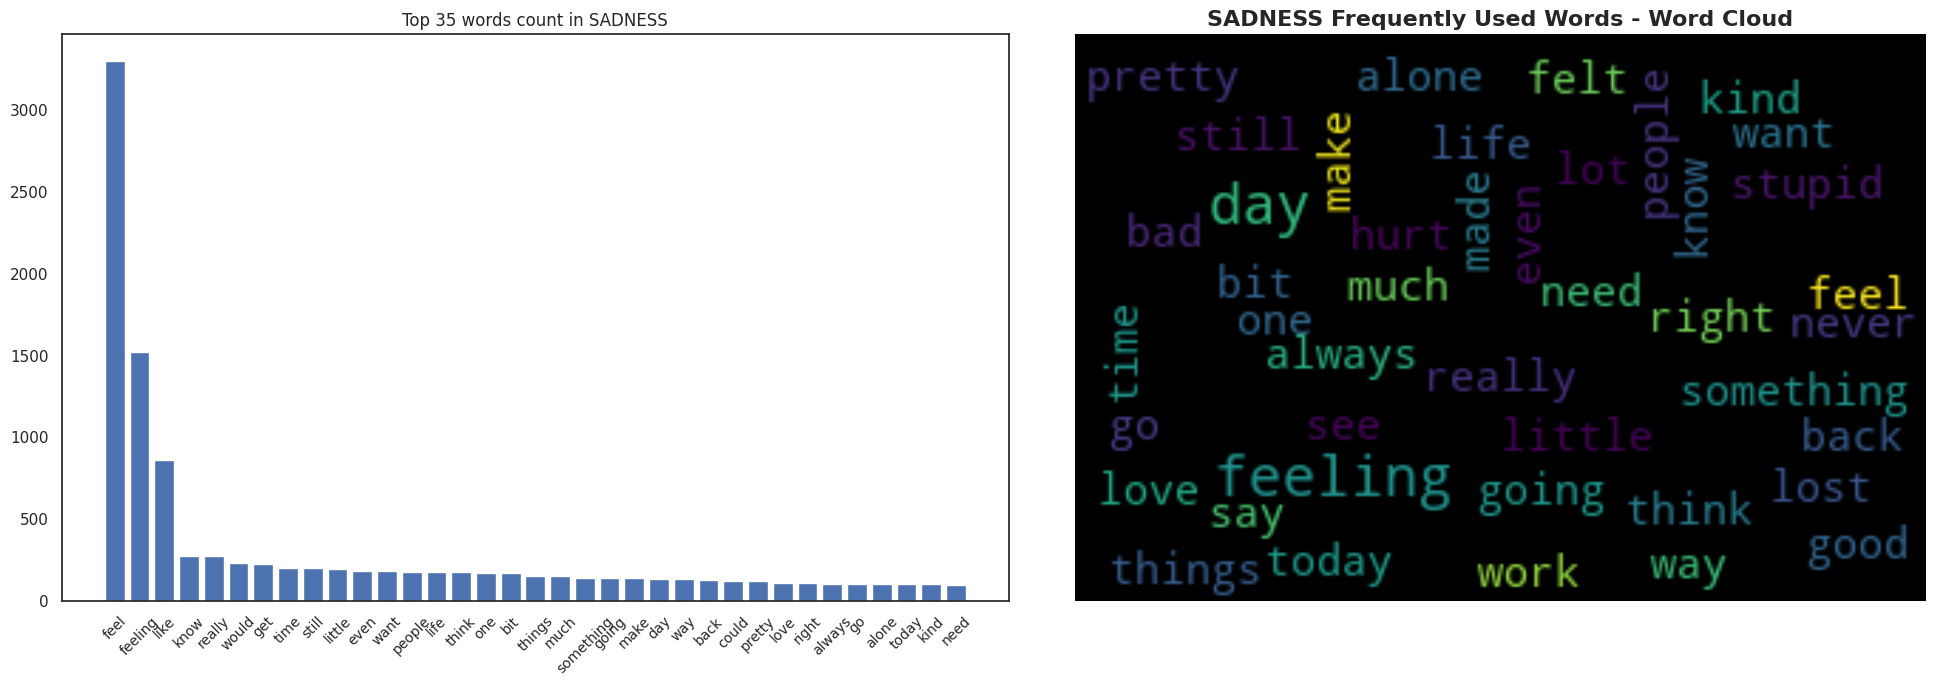

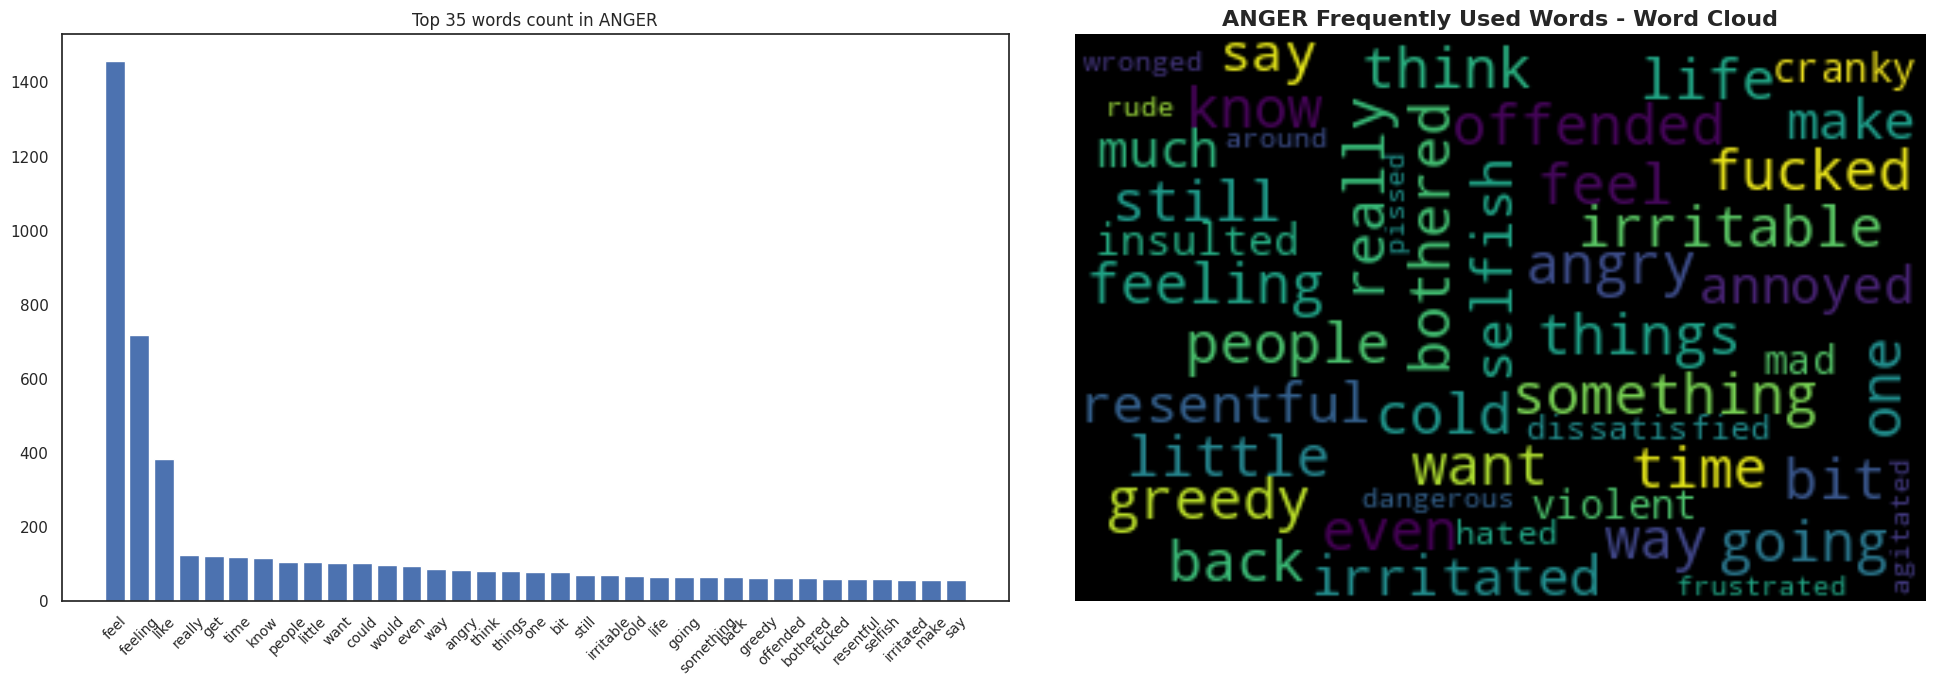

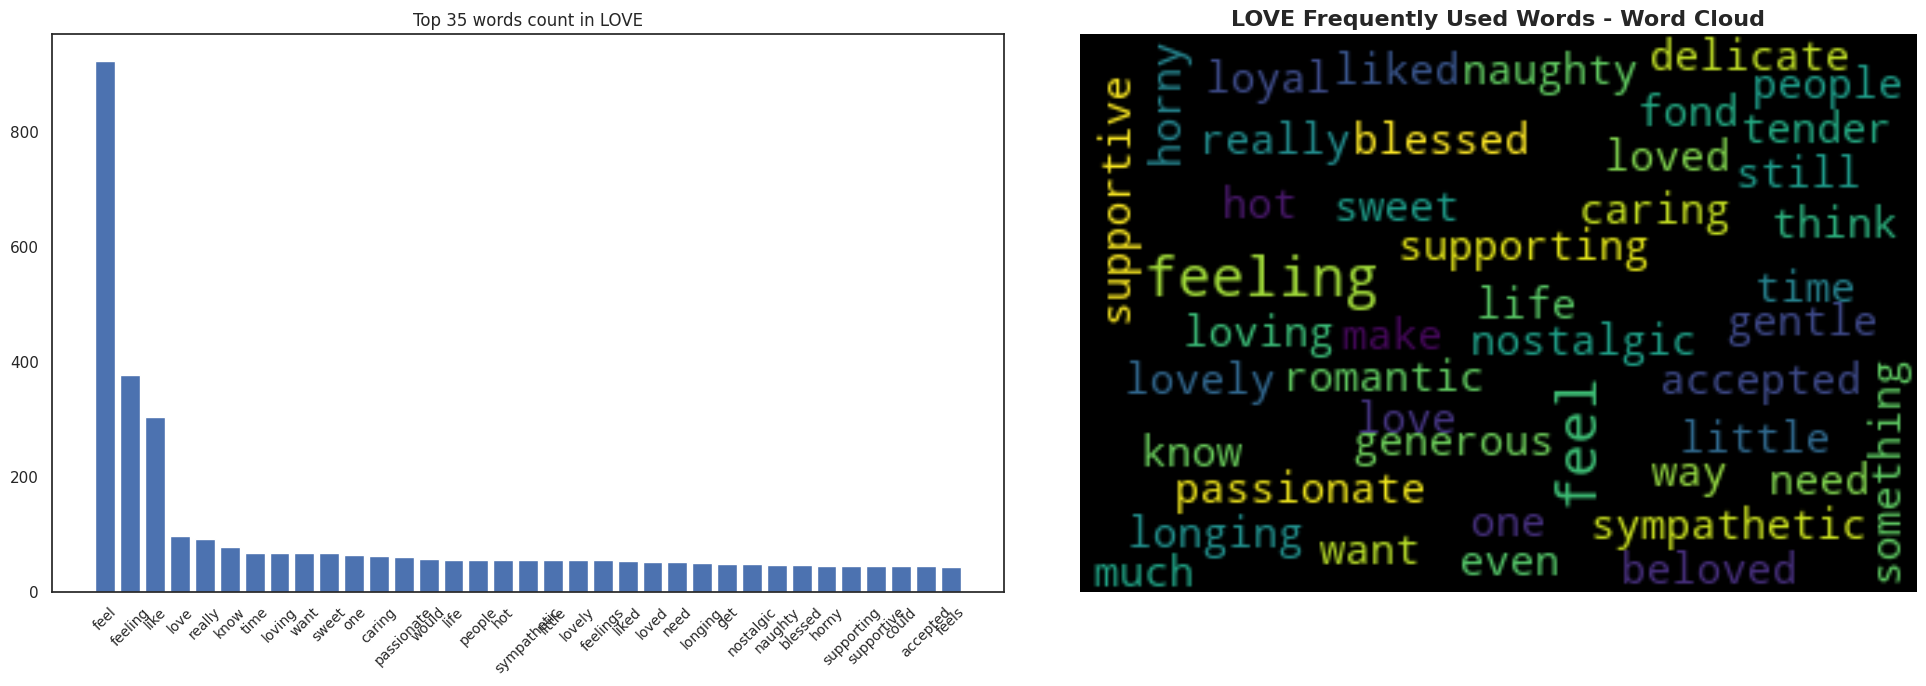

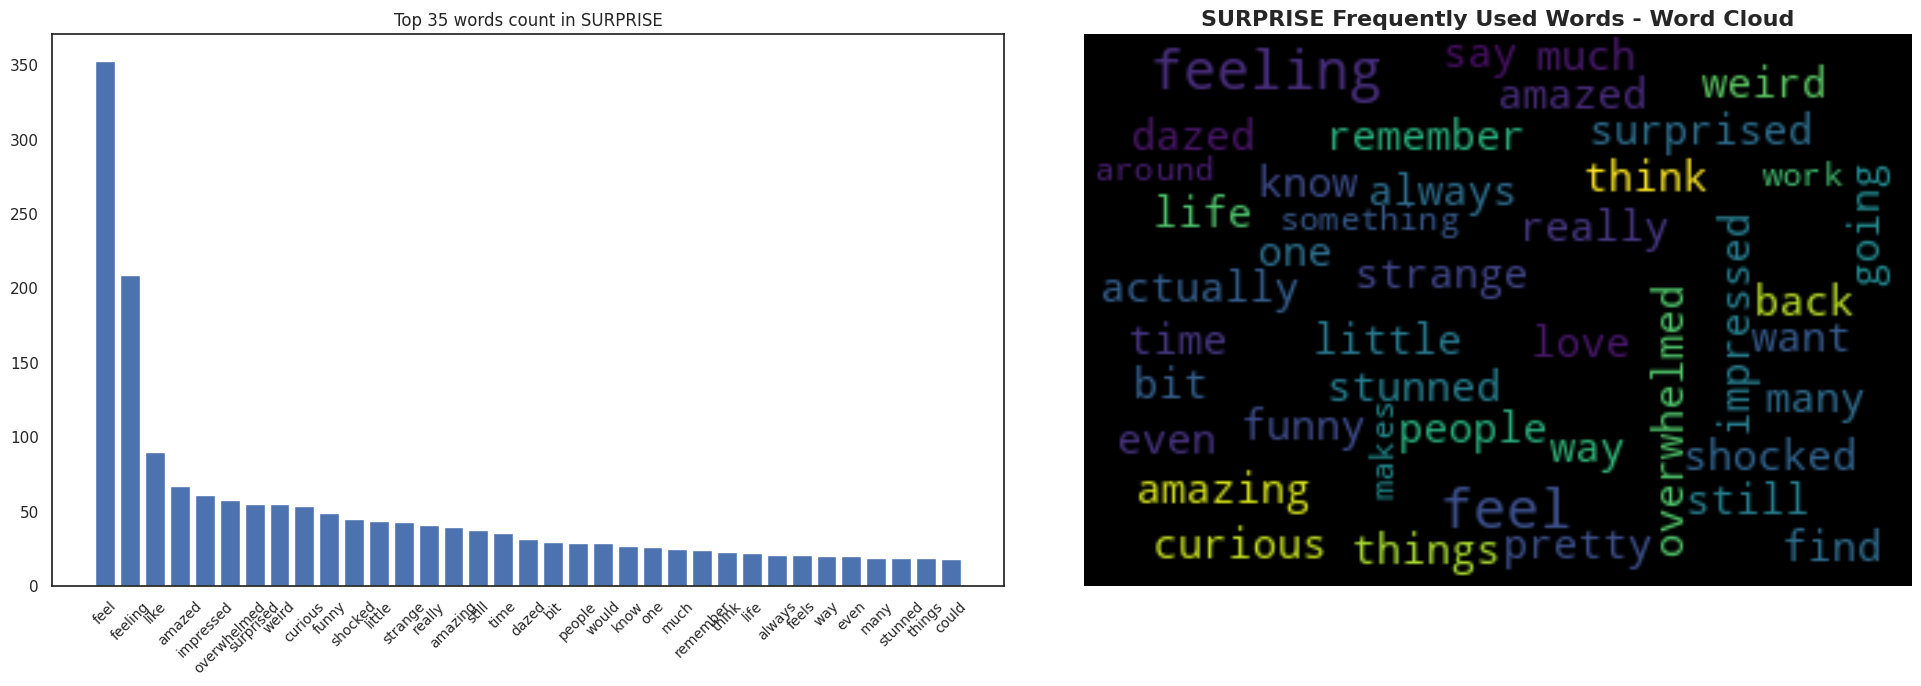

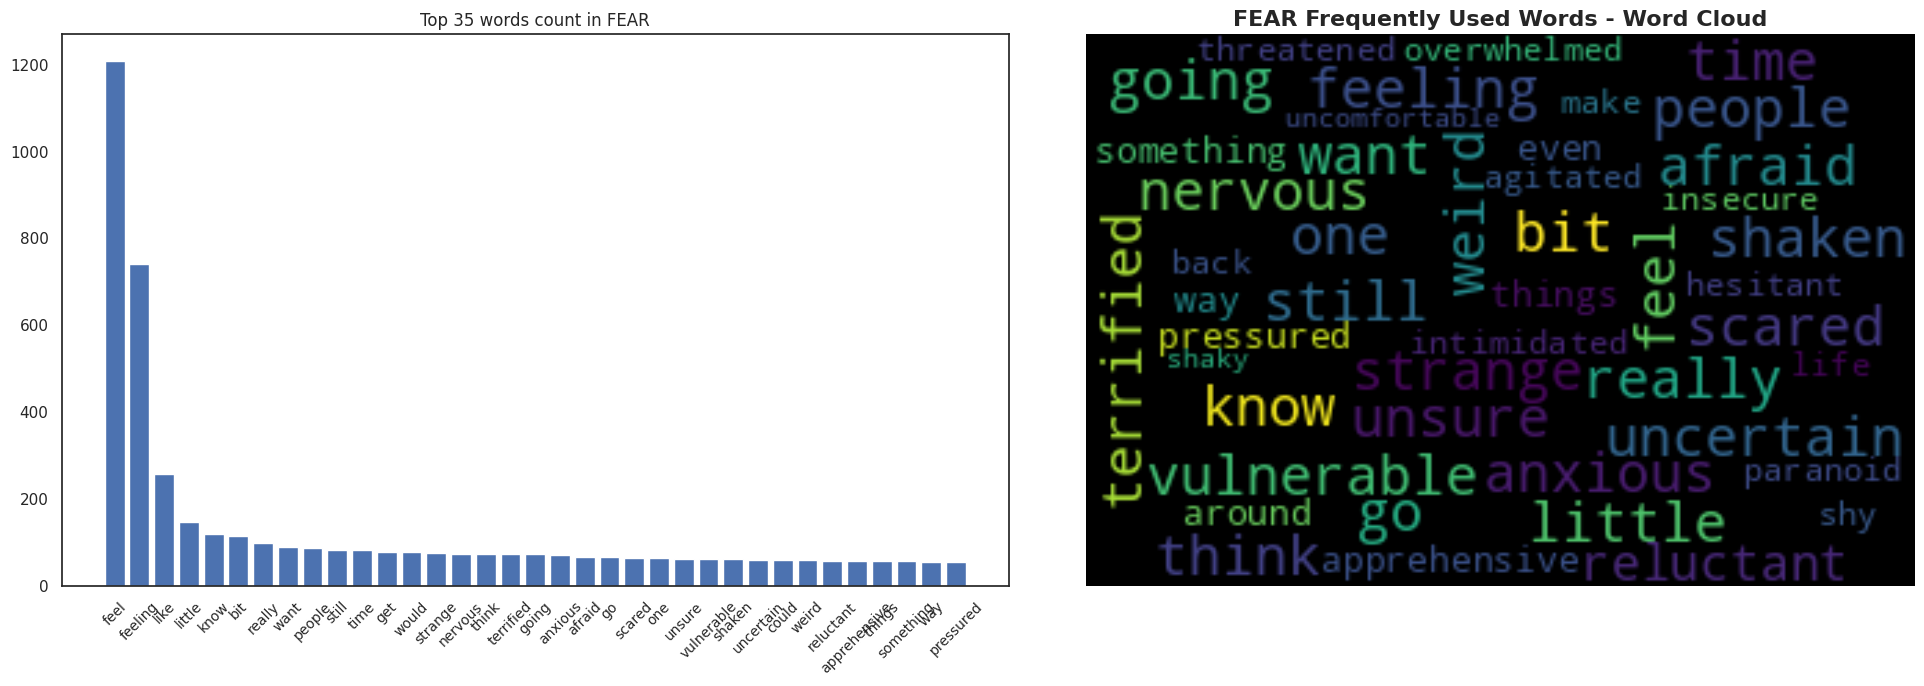

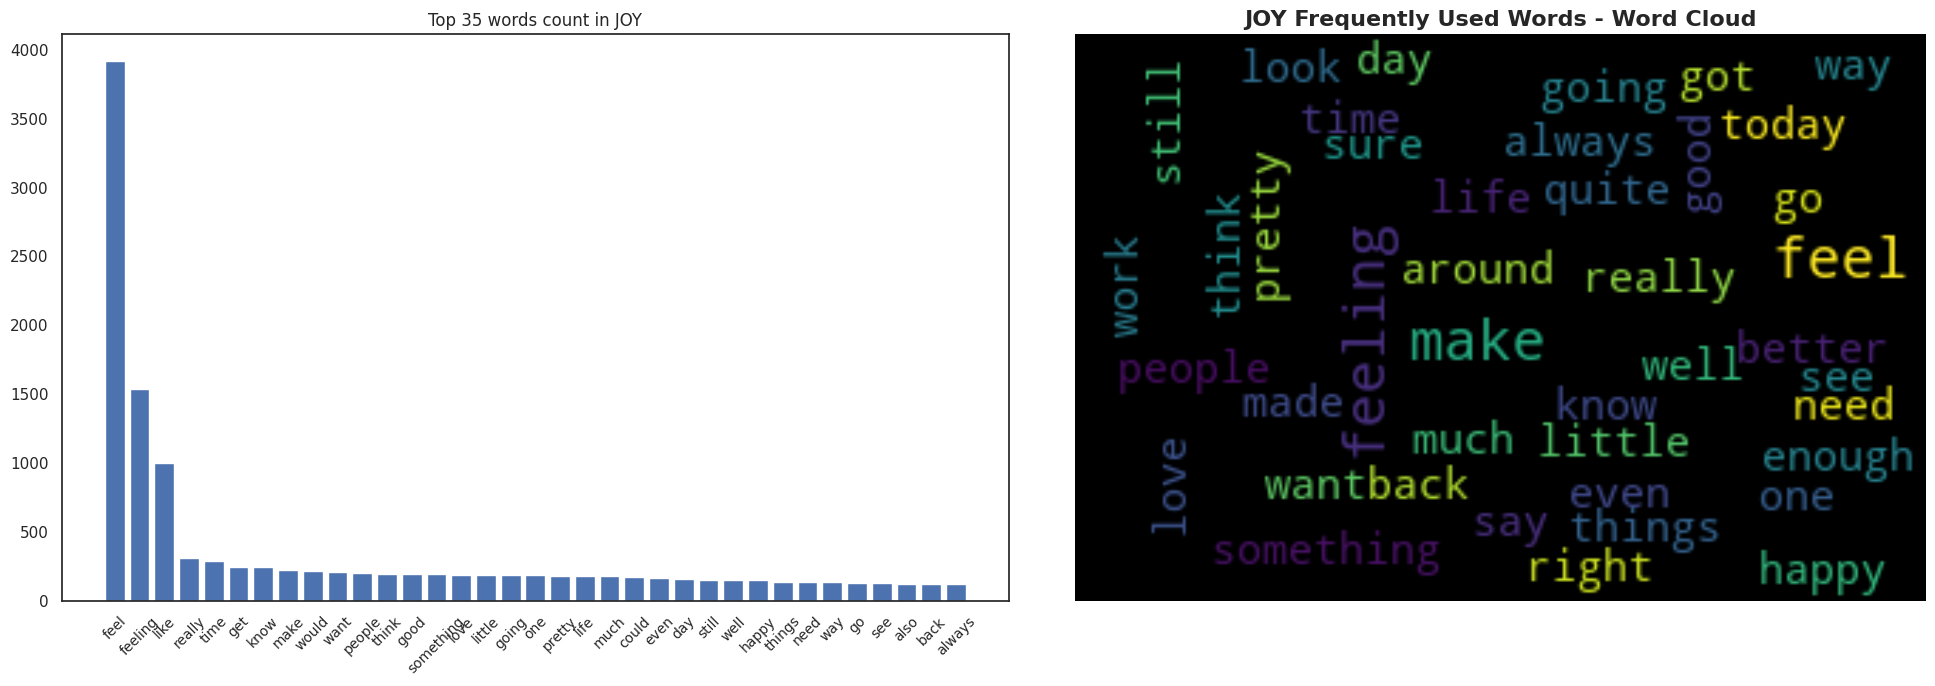

In [45]:
word_collection = {}
for emotion in temp['Emotion'].unique():
    tweets = temp[temp['Emotion'] == emotion]
    tweets_words = ' '.join([tweet for tweet in tweets['text']])

    tweets_words = nltk.word_tokenize(tweets_words)
    tweets_words = [word for word in tweets_words if word not in stopwords.words('english')]

    common_words = pd.DataFrame({'Mostly_used_words': tweets_words}, index=range(len(tweets_words)))
    word_collection[emotion] = common_words['Mostly_used_words'].value_counts()[:50]  # storing top 50

    # Create a new figure for each emotion
    fig, axes = plt.subplots(1, 2, figsize=(20, 7))

    # Plot top 35 words count
    axes[0].bar(word_collection[emotion][:35].index, word_collection[emotion][:35].values)
    axes[0].set_title('Top 35 words count in {}'.format(emotion.upper()))
    axes[0].tick_params(axis='x', rotation=45, labelsize=10)

    # Plot word cloud
    freq_words = ' '.join(list(word_collection[emotion].keys()))
    wordcloud = WordCloud(height=200, width=300, min_font_size=8,
                          max_font_size=20, background_color='black').generate(freq_words)

    # Plot word cloud
    axes[1].imshow(wordcloud, interpolation='bilinear')
    axes[1].set_title('{} Frequently Used Words - Word Cloud'.format(emotion.upper()),
                      fontdict={'fontsize': 16, 'fontweight': 'bold'})
    axes[1].axis('off')  

    plt.tight_layout()

    # display the individual plots
    plt.savefig('wordcloud_wordcount_{}.png'.format(emotion.lower()))
    plt.show()

## N-Gram Analysis

- In (NLP), N-grams play a crucial role in capturing patterns and relationships between words in textual data. N-grams are contiguous sequences of 'n' items, typically words, extracted from a given text. 
- Here, we perform N-gram analysis, focusing on both bigrams (two-word sequences) and trigrams (three-word sequences).

### Bigram Analysis
- For bigrams, we utilize the CountVectorizer from scikit-learn to transform the text data into a matrix of bigram counts. 
- The resulting frequency distribution of bigrams is then visualized using a horizontal bar plot. 
- Each bar represents a unique bigram, and distinct colors are assigned to enhance visibility and distinguish between different bigrams.

### Trigram Analysis
- Similar to bigrams, trigrams are generated using the CountVectorizer, and their frequency distribution is visualized in a horizontal bar plot. 
- Each trigram is represented by a bar, and distinct colors are assigned to provide clarity and highlight differences between trigrams.


- These analyses help uncover the most frequently occurring bigrams and trigrams in the text data associated with specific issue types. Such insights contribute to a better understanding of language patterns, aiding in the interpretation of sentiment, context, and key themes within the text.


In [46]:
# BIGRAM ANALYSIS


def plot_bigram_analysis(df, label):
    curr_df = df[df['Emotion'] == label].sample(frac=0.15, random_state=2023)
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    bigrams = vectorizer.fit_transform(curr_df['text'])
    
    # Get these values as an array
    count_values = bigrams.toarray().sum(axis=0)
    ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in vectorizer.vocabulary_.items()], reverse=True))
    ngram_freq.columns = ["frequency", "ngram"]
    
    fig, ax = plt.subplots(figsize=(9, 6))
    colors = sns.color_palette("tab10", n_colors=len(ngram_freq))
    # Plot top 10 most frequently occurring bigrams
    sns.barplot(x=ngram_freq['ngram'][:10], y=ngram_freq['frequency'][:10], palette=colors, ax=ax)
    ax.set_title(f'Top 10 Most Frequently Occurring Bigrams on {label}', fontweight="bold")
    plt.xticks(rotation=45, ha='right', fontweight="bold")
    plt.xticks(rotation=45, ha='right', fontweight="bold")
    plt.tight_layout()
    plt.savefig('bigram_analysis_{}.png'.format(label.lower()))
    plt.show()


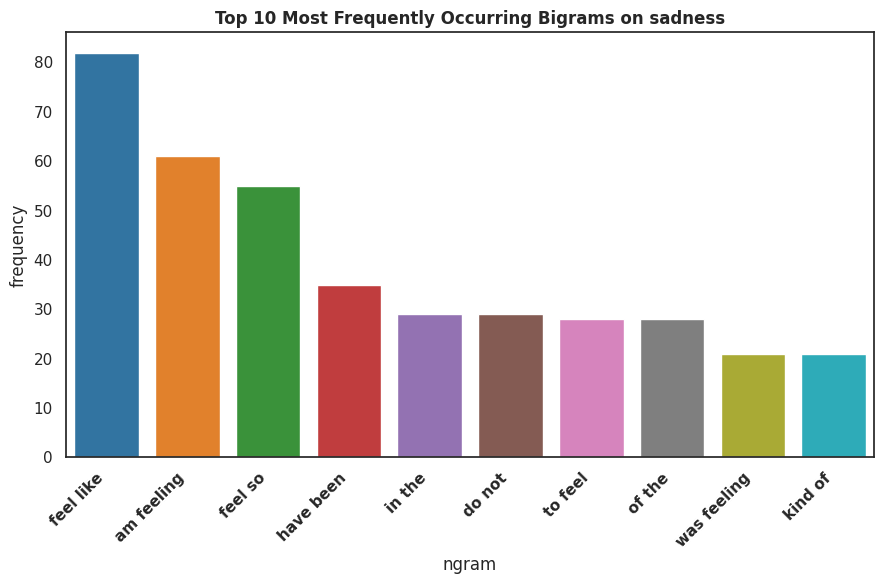

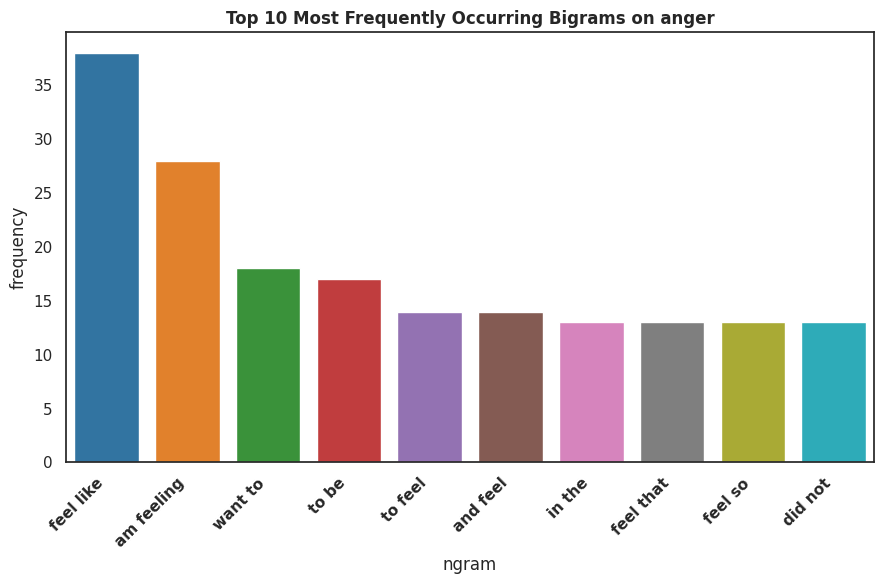

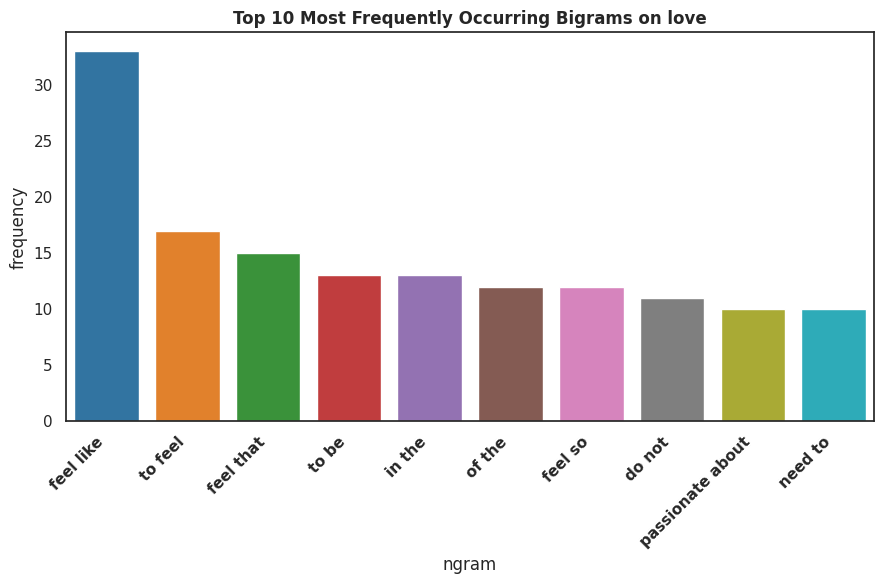

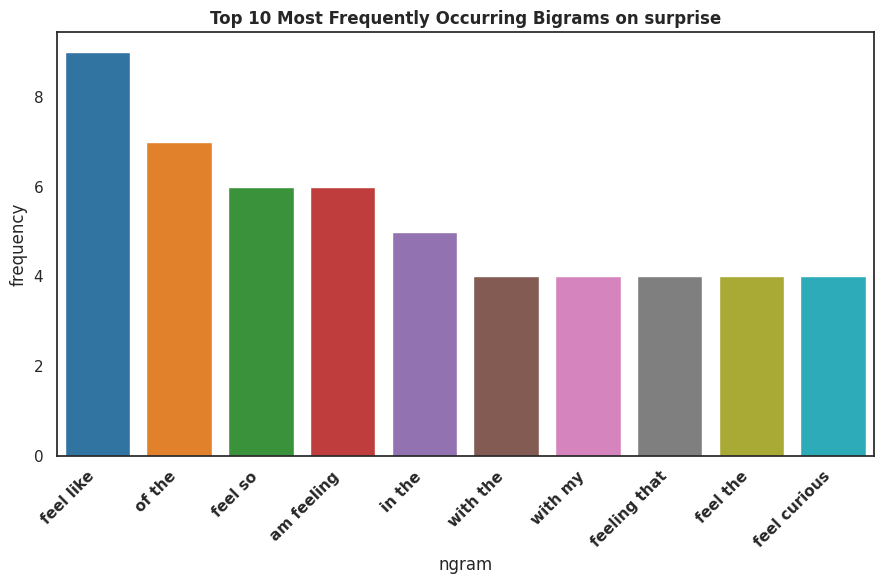

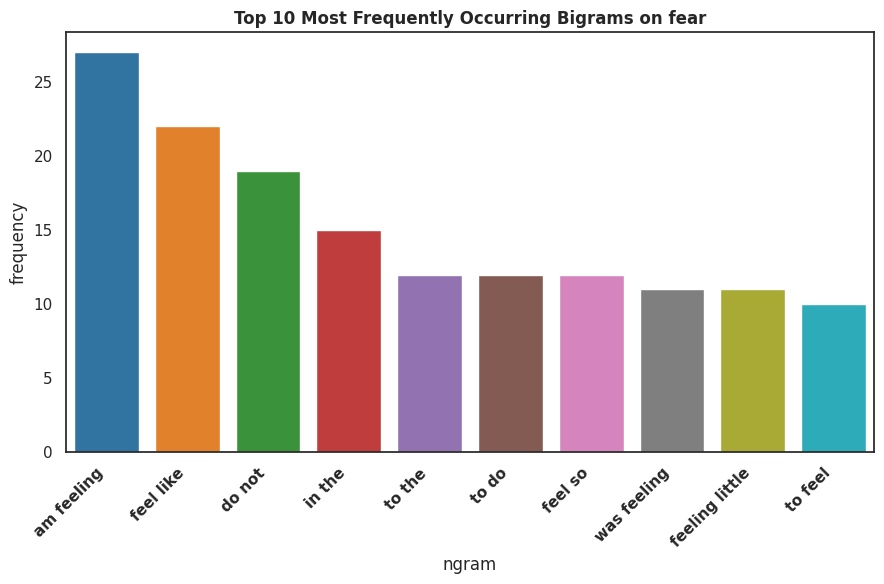

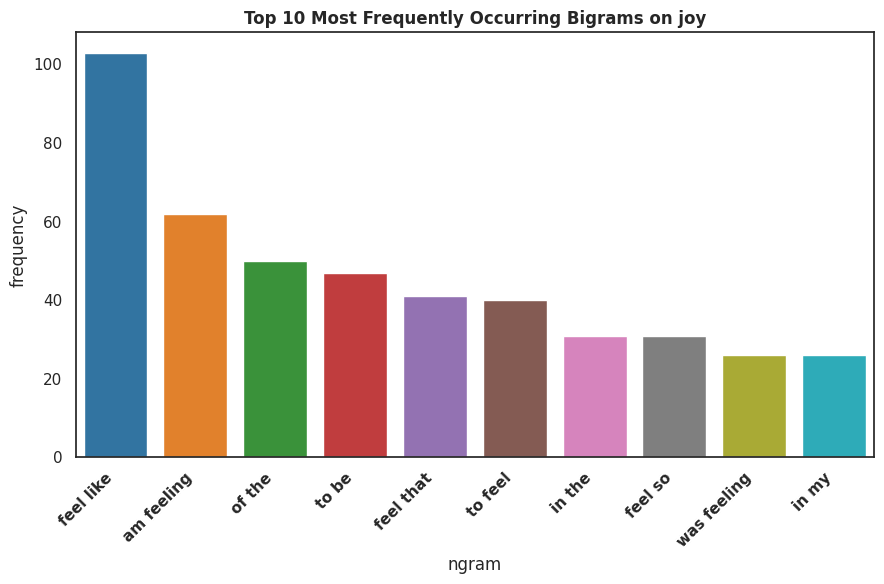

In [47]:
for lbl_ in temp["Emotion"].unique():
    plot_bigram_analysis(df, lbl_)

In [48]:
# plot TRIGRAMS

def plot_trigram_analysis(df, label):
    curr_df = df[df['Emotion'] == label].sample(frac=0.15, random_state=2023)
    vectorizer = CountVectorizer(ngram_range=(3, 3))
    trigrams = vectorizer.fit_transform(curr_df['text'])
    
    # Get these values as an array
    count_values = trigrams.toarray().sum(axis=0)
    ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in vectorizer.vocabulary_.items()], reverse=True))
    ngram_freq.columns = ["frequency", "ngram"]
    
    # Create a new figure for each issue type
    fig, ax = plt.subplots(figsize=(9, 6))
    
    # Plot top 10 most frequently occurring trigrams
    sns.barplot(y=ngram_freq['frequency'][:10], x=ngram_freq['ngram'][:10], ax=ax, palette=sns.color_palette("tab10", n_colors=len(ngram_freq)))
    ax.set_title(f'Top 10 Most Frequently Occurring Trigrams on {label}', fontweight="bold")
    
    # Rotate x-axis labels for better readability
    plt.yticks(rotation=45, ha='right', fontweight="bold")
    plt.xticks(rotation=45, ha='right', fontweight="bold")
    
    # Adjust layout
    plt.tight_layout()
    
    # Save or display the individual plots
    plt.savefig('trigram_analysis_{}.png'.format(label.lower()))
    plt.show()

    

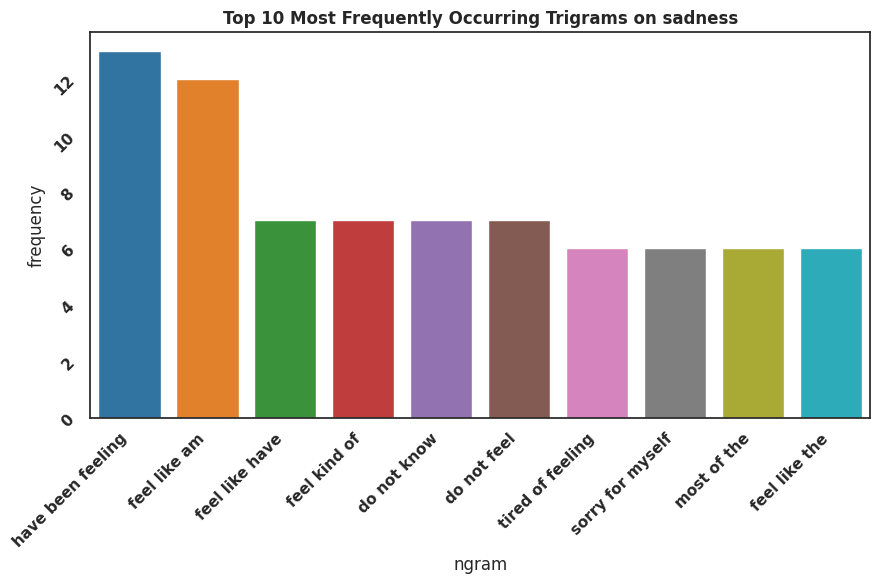

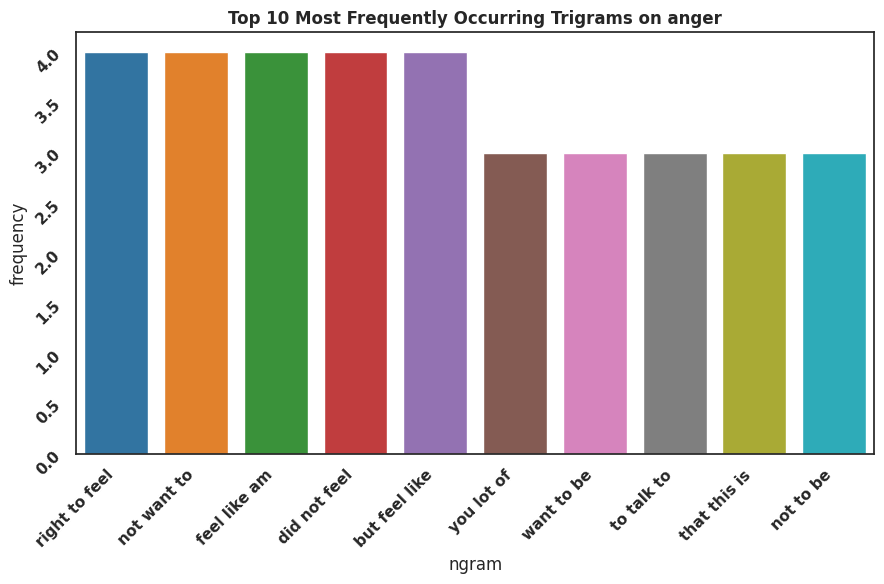

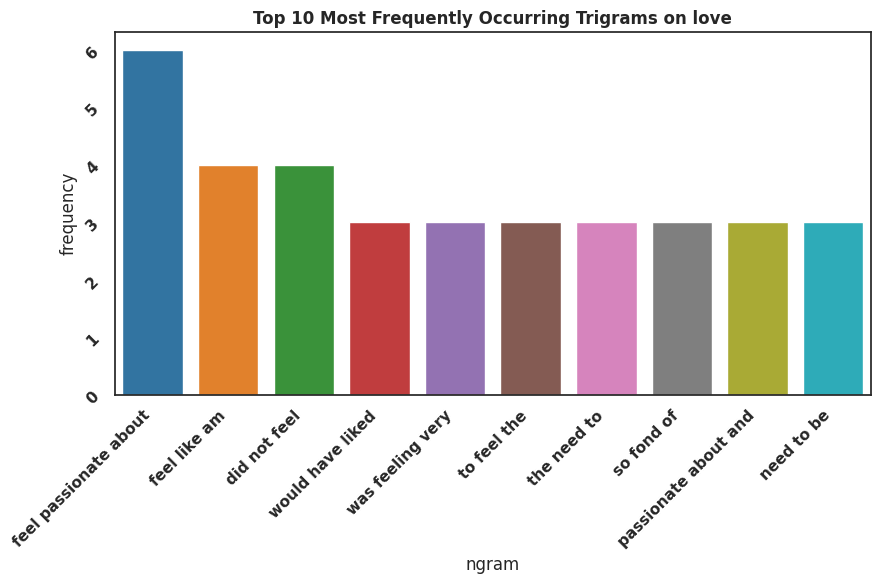

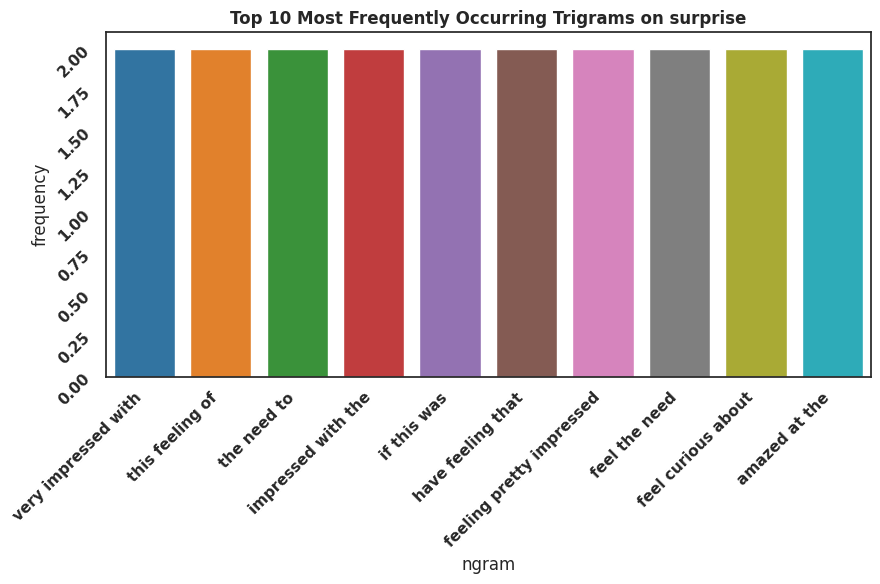

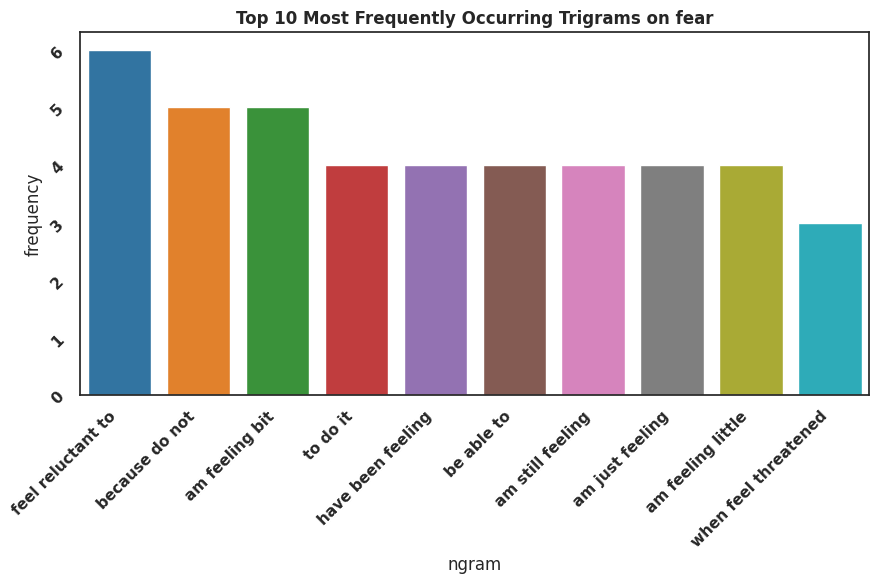

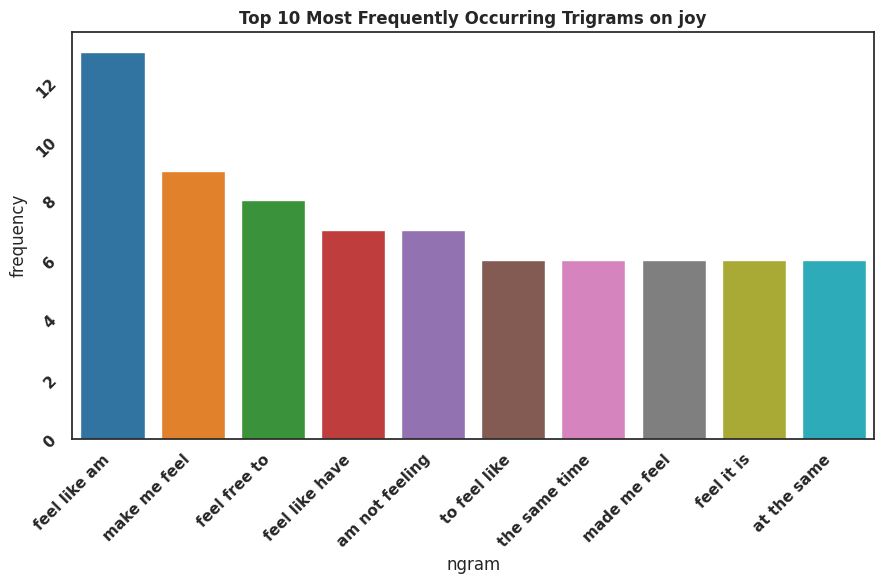

In [49]:
for lbl_ in temp["Emotion"].unique():
    plot_trigram_analysis(df, lbl_)

In [50]:
train.shape, test.shape, val.shape

((15959, 3), (2000, 3), (1997, 3))

## Machine Learning

In this section, we will evaluate three different machine learning algorithms for the emotion detection task. The chosen algorithms represent a diverse set, including a powerful transformer model (BERT), a simple Recurrent Neural Network (RNN), and a traditional classification algorithm.

### Algorithms Overview

1. **BERT Model:**
   - BERT (Bidirectional Encoder Representations from Transformers) is a state-of-the-art transformer-based model known for its contextual understanding of language. We will leverage BERT's pre-trained embeddings for emotion detection.

2. **Simple RNN Model BASED ON LSTM:**
   - A simple Recurrent Neural Network (RNN) will be employed as a baseline model. RNNs are capable of capturing sequential dependencies in data, making them suitable for text-based tasks.

3. **Classical Algorithm:**
   - A classical machine learning algorithm, such as Support Vector Machine (SVM) or Random Forest, will be used to contrast against the neural network models. This provides a comparison between traditional and deep learning approaches.

### Model Evaluation

All models will be analyzed based on their accuracies to assess their performance in emotion detection.

### Train-Test Split

The dataset has already been splitted into:
- **Training Set (60%):** The majority of the data will be used for training the models.
- **Testing Set (20%):** A subset of the data reserved for assessing the model's performance during testing.
- **Validation Set (20%):** A separate subset for fine-tuning hyperparameters and preventing overfitting.

This split is crucial to train the models on diverse samples, validate their performance during development, and assess their generalization on unseen data during testing.


In [51]:
# remove stopwords

ps = PorterStemmer()
def remove_stopwords(text):
    clean_text = nltk.word_tokenize(text)
    clean_text = ' '.join([ps.stem(word) for word in clean_text if word not in ALL_STOPWORDS and len(word)>2])
    
    return clean_text

train["text"] = train["text"].apply(remove_stopwords)
test["text"] = test["text"].apply(remove_stopwords)
val["text"] = val["text"].apply(remove_stopwords)

In [52]:
# check sample
train.head()

Text  Emotion  \
0                            i didnt feel humiliated  sadness   
1  i can go from feeling so hopeless to so damned...  sadness   
2   im grabbing a minute to post i feel greedy wrong    anger   
3  i am ever feeling nostalgic about the fireplac...     love   
4                               i am feeling grouchy    anger   

                                              text  
0                                      feel humili  
1  feel hopeless damn hope around someon care awak  
2                grab minut post feel greedi wrong  
3   ever feel nostalg fireplac know still properti  
4                                     feel grouchi

In [53]:
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()

train["label"] = lbl_enc.fit_transform(train["Emotion"])
test["label"] = lbl_enc.transform(test["Emotion"])
val["label"] = lbl_enc.transform(val["Emotion"])

In [54]:
# get a sample df to use
# df_sample = train.sample(frac=0.7, random_state=2024)

In [55]:
train_df = train.copy()
test_df = test.copy()
validation_df = val.copy()

In [56]:
# check the sizes
train_df.shape, test_df.shape, validation_df.shape

((15959, 4), (2000, 4), (1997, 4))

#### Feature Engineering using TFIDF Vectorizer

In [57]:
vectorizer = TfidfVectorizer()
# fit the vectorizer with the data
vectorizer.fit(train['text'])

# we will then use this vectorizer with each data split.

TfidfVectorizer()

In [58]:
# split the data using it
Xtrain1 = vectorizer.transform(train_df['text'])
Xtest1 = vectorizer.transform(test_df['text'])
Xval1 = vectorizer.transform(validation_df['text'])


# get the labels
Ytrain1 = train_df['label']
Ytest1 = test_df['label']
Yval1 = validation_df['label']
# check their shape

Xtrain1.shape, Xtest1.shape,Xval1.shape, Ytrain1.shape, Ytest1.shape, Yval1.shape

((15959, 10099), (2000, 10099), (1997, 10099), (15959,), (2000,), (1997,))

### Using Logistic Regression CLASSIFIER.
- For this model, we will train it using features generated by count vectorizer which counts the number of times a text is appearing in a text.

In [59]:
# import log model
from sklearn.linear_model import LogisticRegression

In [60]:
# create the model
model1 = LogisticRegression(random_state=2023,solver='liblinear')

# fit the model
model1.fit(Xtrain1, Ytrain1)

# get score on test
model1.score(Xtest1, Ytest1)

0.8415

In [61]:

def draw_confusion_matrix(actual, predicted, model_name):
    #get the normal metrics printed..
    print(f"{model_name} Metrics Analysis Results\n")
    
    ##Classification Report
    print(classification_report(actual, predicted))
    print()
    print("\tAccuracy is  ", accuracy_score(actual, predicted))
    print("\tF1 Score is  ", f1_score(actual,predicted, average='weighted'))
    print("\tRecall Score is  ", recall_score(actual, predicted, average='weighted'))
    print("\tPrecision Score is  ", precision_score(actual, predicted, average='weighted'))

    print("\n")
    cm = confusion_matrix( actual, predicted)
    sns.set(rc = {'figure.figsize': (6, 6)})
    sns.heatmap(
        cm, annot=True,  fmt='', linewidth=0.01,
        cmap = 'Reds', xticklabels=lbl_enc.classes_.tolist(), 
        yticklabels=lbl_enc.classes_.tolist())
    plt.xlabel('True label', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.ylabel('Predicted label', fontsize=16, fontweight='bold')
    plt.title(f"{model_name}'s Perfomance", fontsize=19, fontweight='bold')
    plt.show()
    
def compute_summary_perfomance(pred,y):
    """
        Compute F1 score, Recall, and Precision for each class.

        Parameters:
        - pred: Prediceted labels.
        - y: True labels.

        Returns:
        - DataFrame containing F1 score, Recall, and Precision for each class
    """
    # Calculate the F1, recall, prec score for the predictions
    f1=f1_score(y,pred, average=None)
    rec = recall_score(y,pred, average=None)
    prec = precision_score(y,pred, average=None)
    # Return the summary score
    return pd.DataFrame(
        {"F1 score":f1, "Recall Score":rec, "Precision Score": prec}, 
        index=lbl_enc.classes_, 
        columns=['F1 score', "Recall Score", "Precision Score"]
    ).style.background_gradient(cmap="magma", axis=None)


Logistic Reg. Classifier Metrics Analysis Results

              precision    recall  f1-score   support

       anger       0.85      0.79      0.82       275
        fear       0.86      0.77      0.81       224
         joy       0.82      0.94      0.88       695
        love       0.80      0.52      0.63       159
     sadness       0.86      0.91      0.89       581
    surprise       0.84      0.47      0.60        66

    accuracy                           0.84      2000
   macro avg       0.84      0.73      0.77      2000
weighted avg       0.84      0.84      0.84      2000


	Accuracy is   0.8415
	F1 Score is   0.8352415347855257
	Recall Score is   0.8415
	Precision Score is   0.8410327828380164




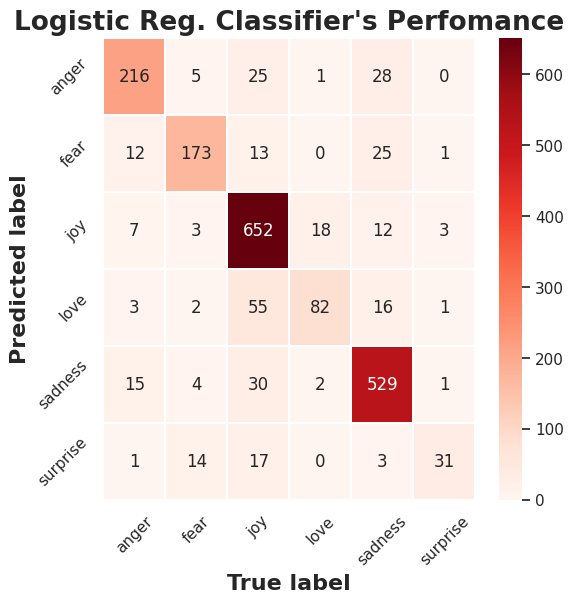

In [62]:
draw_confusion_matrix(
    lbl_enc.inverse_transform(Ytest1),
    lbl_enc.inverse_transform(model1.predict(Xtest1)), 
    "Logistic Reg. Classifier"
)

In [63]:
# perfomance summary
compute_summary_perfomance(model1.predict(Xval1), Yval1)

In [64]:
from xgboost import XGBClassifier

# create the model
xgb_model  = XGBClassifier(n_estimators=150)

# fit the model
xgb_model.fit(Xtrain1, Ytrain1)

# get score on test
xgb_model.score(Xtest1, Ytest1)

0.864

XGBOOST Classifier Metrics Analysis Results

              precision    recall  f1-score   support

       anger       0.87      0.89      0.88       275
        fear       0.84      0.86      0.85       224
         joy       0.88      0.90      0.89       695
        love       0.71      0.68      0.69       159
     sadness       0.93      0.88      0.90       581
    surprise       0.64      0.73      0.68        66

    accuracy                           0.86      2000
   macro avg       0.81      0.82      0.82      2000
weighted avg       0.87      0.86      0.86      2000


	Accuracy is   0.864
	F1 Score is   0.8643329094878958
	Recall Score is   0.864
	Precision Score is   0.8654915408368864




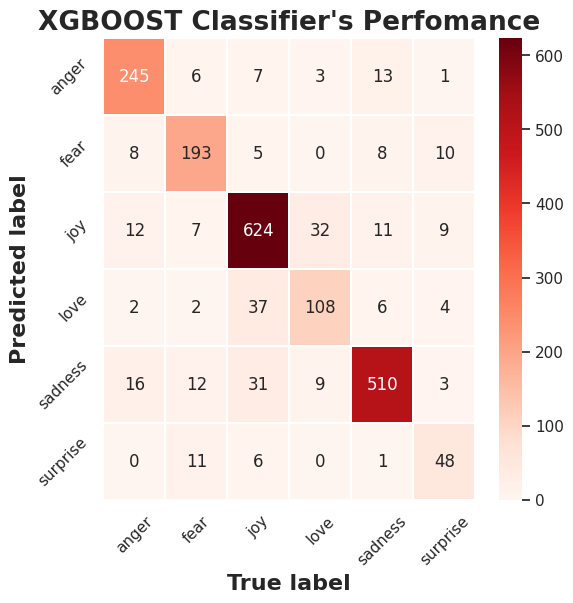

In [65]:
draw_confusion_matrix(
    lbl_enc.inverse_transform(Ytest1),
    lbl_enc.inverse_transform(xgb_model.predict(Xtest1)), 
    "XGBOOST Classifier"
)

In [66]:
# summary for xgboost

compute_summary_perfomance(xgb_model.predict(Xval1), Yval1)

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=2024)
rf_model.fit(Xtrain1, Ytrain1)
accuracy = rf_model.score(Xtest1, Ytest1)
print(f"RF Accuracy: {accuracy}")

RF Accuracy: 0.853


Random Forest Classifier Metrics Analysis Results

              precision    recall  f1-score   support

       anger       0.85      0.88      0.86       275
        fear       0.78      0.87      0.82       224
         joy       0.88      0.89      0.88       695
        love       0.74      0.63      0.68       159
     sadness       0.91      0.88      0.90       581
    surprise       0.60      0.56      0.58        66

    accuracy                           0.85      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.85      0.85      0.85      2000


	Accuracy is   0.853
	F1 Score is   0.8519858498024503
	Recall Score is   0.853
	Precision Score is   0.8524923257272471




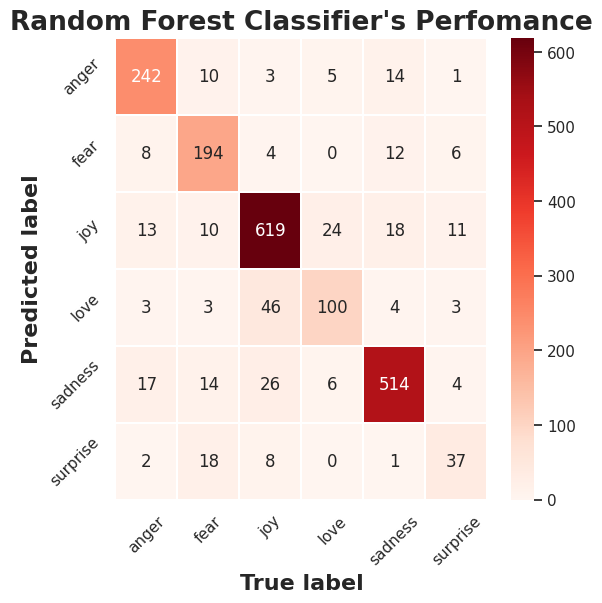

In [68]:
draw_confusion_matrix(
    lbl_enc.inverse_transform(Ytest1),
    lbl_enc.inverse_transform(rf_model.predict(Xtest1)), 
    "Random Forest Classifier"
)

In [69]:
# summary for randomforest
compute_summary_perfomance(rf_model.predict(Xval1), Yval1)

## RNN Model

**Recurrent Neural Networks (RNN):**

Recurrent Neural Networks (RNNs) represent a state-of-the-art algorithm for processing sequential data and find applications in prominent technologies such as Apple's Siri and Google's voice search. RNNs possess an internal memory that enables them to remember past inputs, making them particularly well-suited for machine learning tasks involving sequential data.

**Embedding Layer:**

The Embedding layer is a crucial component in Keras, commonly employed in Natural Language Processing (NLP) applications like language modeling. It can also be utilized in various other tasks involving neural networks. In NLP, practitioners often leverage pre-trained word embeddings such as GloVe. Additionally, the Embedding layer allows for the training of custom embeddings directly within Keras.

**LSTM Layer:**

Long Short-Term Memory networks, abbreviated as LSTMs, were introduced by Hochreiter and Schmidhuber. LSTMs have found extensive applications in speech recognition, language modeling, sentiment analysis, and text prediction. To understand the significance of LSTMs, it's essential to recognize the limitations of practical Recurrent Neural Networks (RNNs). Let's delve into the motivation behind LSTMs by first exploring the challenges associated with traditional RNNs.


In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint

In [71]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df.text)
sequences = tokenizer.texts_to_sequences(train_df.text)
Xtrain2 = pad_sequences(sequences, maxlen=max_len)
print(Xtrain2)

[[   0    0    0 ...    0    1  559]
 [   0    0    0 ...   62   89 1080]
 [   0    0    0 ...    1  404  171]
 ...
 [   0    0    0 ...  247   34 1138]
 [   0    0    0 ...  457  454  254]
 [   0    0    0 ...    1  193 1611]]


In [72]:
# transform also the validation and test data
Xtest2 = pad_sequences(
    tokenizer.texts_to_sequences(test_df.text), maxlen=max_len
)

Xval2 = pad_sequences(
    tokenizer.texts_to_sequences(validation_df.text), maxlen=max_len
)

In [73]:
# get the labels as categorical
Ytrain2 = to_categorical(Ytrain1)
Ytest2 = to_categorical(Ytest1)
Yval2 = to_categorical(Yval1)

In [74]:
Yval2

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [75]:
# create a model
model2 = Sequential()
model2.add(Embedding(max_words, 128))
model2.add(LSTM(64,dropout=0.5, return_sequences=True))
model2.add(LSTM(32,dropout=0.5))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(6,activation='sigmoid'))


In [76]:
# check model summary
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         640000    
                                                                 
 lstm (LSTM)                 (None, None, 64)          49408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
Total params: 702542 (2.68 MB)
Trainable params: 702542 

In [77]:
checkpoint2 = ModelCheckpoint(
    "rnn_model.hdf5", 
    monitor='val_accuracy', 
    verbose=1,save_best_only=True, 
    mode='auto', period=2,save_weights_only=False)

In [78]:
# create the F1 score metric function
def f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1

In [79]:
# compile the model
model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy', f1])

In [80]:
# train the model
rnnhistory = model2.fit(
    Xtrain2, Ytrain2, 
    epochs=10,
    validation_data=(Xval2, Yval2),
    callbacks=[checkpoint2])

Epoch 1/10


I0000 00:00:1707034573.607768      86 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


499/499 [==============================] - 24s 35ms/step - loss: 1.3816 - accuracy: 0.4563 - f1: 0.4312 - val_loss: 0.9319 - val_accuracy: 0.6355 - val_f1: 0.4819
Epoch 2/10
496/499 [============================>.] - ETA: 0s - loss: 0.6392 - accuracy: 0.7664 - f1: 0.5607
Epoch 2: val_accuracy improved from -inf to 0.83826, saving model to rnn_model.hdf5
499/499 [==============================] - 9s 17ms/step - loss: 0.6378 - accuracy: 0.7671 - f1: 0.5612 - val_loss: 0.4722 - val_accuracy: 0.8383 - val_f1: 0.6145
Epoch 3/10
499/499 [==============================] - 8s 16ms/step - loss: 0.3779 - accuracy: 0.8733 - f1: 0.6139 - val_loss: 0.3442 - val_accuracy: 0.8878 - val_f1: 0.6292
Epoch 4/10
498/499 [============================>.] - ETA: 0s - loss: 0.2719 - accuracy: 0.9095 - f1: 0.6493
Epoch 4: val_accuracy improved from 0.83826 to 0.89484, saving model to rnn_model.hdf5
499/499 [==============================] - 8s 16ms/step - loss: 0.2716 - accuracy: 0.9095 - f1: 0.6494 - val_loss

In [81]:
def training_history(history, model_name):
    metrics = ['loss', 'accuracy', "f1"]
    titles = ['Loss', 'Accuracy', 'F1 Score']
    ylabels = ['Loss', 'Accuracy', 'F1 Score']
    colors = "bgrcmyk"
    x = np.arange(1, len(history['loss']) + 1)

    fig, ax = plt.subplots(1, len(metrics), figsize=(15, 5))

    for i, metric in enumerate(metrics):
        if "f1_score" in list(history.keys()) and metric == "f1":
            train_metric = history[f'{metric}_score']
            val_metric = history[f'val_{metric}_score']
        else:
            try:
                train_metric = history[f'{metric}']
                val_metric = history[f'val_{metric}']
            except:
                train_metric = history[f'balanced_{metric}']
                val_metric = history[f'val_balanced_{metric}']
            
        

        ax[i].plot(x, train_metric, f'{colors[i]}o-', label=f'Training {titles[i]}', linewidth=2)
        ax[i].plot(x, val_metric, f'{colors[len(colors) - 1 - i]}o-', label=f'Validation {titles[i]}', linewidth=2)
        ax[i].set_xlabel('Epoch', fontsize=12, fontweight='bold')
        ax[i].set_ylabel(ylabels[i], fontsize=12, fontweight='bold')
        ax[i].set_title(f'Training and Validation {titles[i]}', fontsize=14, fontweight='bold')
        ax[i].legend(fontsize=12)

    plt.suptitle(f"Training and Validation Metrics Trends for Model {model_name}", fontweight='bold', fontsize=17, y=1.09)
    plt.tight_layout()
    plt.show()

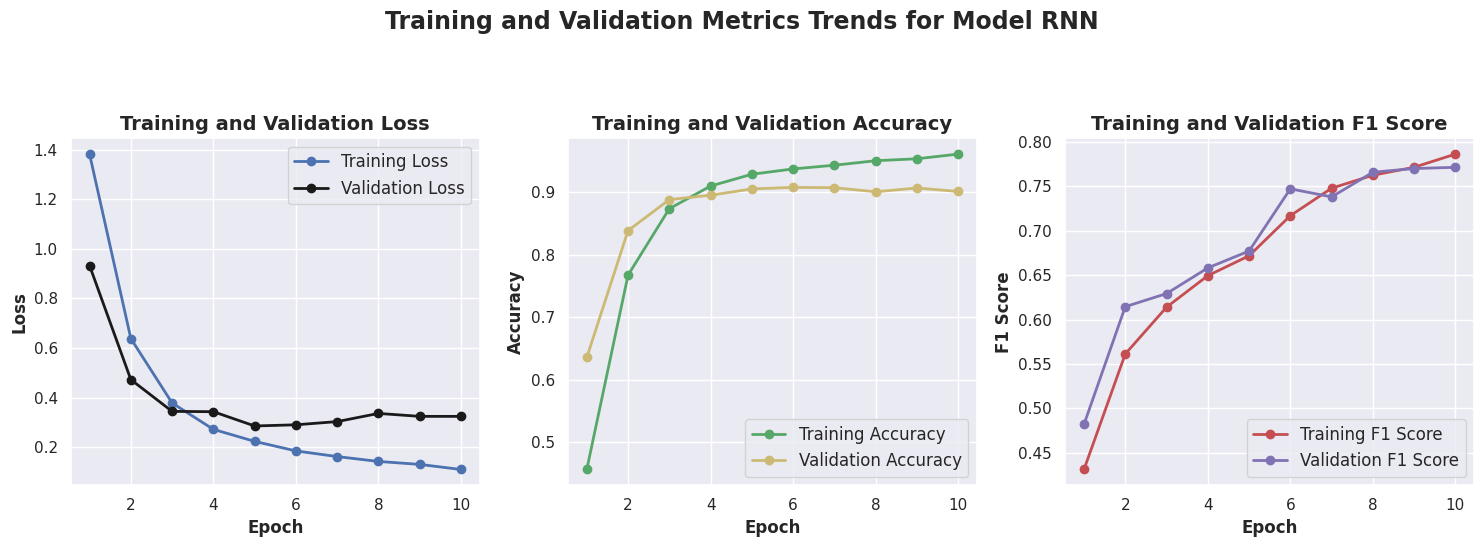

In [82]:
training_history(rnnhistory.history, "RNN")

63/63 [==============================] - 1s 7ms/step
RNN Classifier Metrics Analysis Results

              precision    recall  f1-score   support

       anger       0.91      0.89      0.90       275
        fear       0.87      0.88      0.87       224
         joy       0.95      0.89      0.92       695
        love       0.69      0.84      0.76       159
     sadness       0.92      0.94      0.93       581
    surprise       0.69      0.76      0.72        66

    accuracy                           0.89      2000
   macro avg       0.84      0.87      0.85      2000
weighted avg       0.90      0.89      0.90      2000


	Accuracy is   0.8945
	F1 Score is   0.8961288836180445
	Recall Score is   0.8945
	Precision Score is   0.8998507812499689




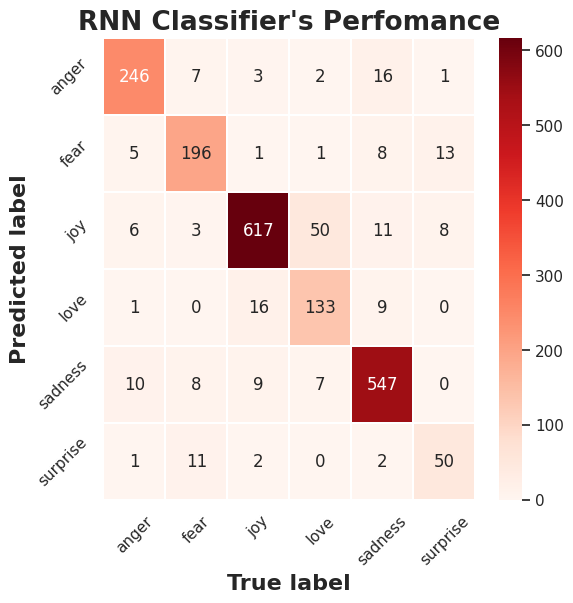

In [83]:
# get model summary
draw_confusion_matrix(
    lbl_enc.inverse_transform(Ytest2.argmax(axis=1)), 
    lbl_enc.inverse_transform(model2.predict(Xtest2).argmax(axis=1)), 
    "RNN Classifier")

In [84]:
compute_summary_perfomance(model2.predict(Xval2).argmax(1), Yval2.argmax(1))

63/63 [==============================] - 0s 6ms/step


## BERT Model

BERT (Bidirectional Encoder Representations from Transformers) stands as a pre-trained language model renowned for its versatility in fine-tuning for various Natural Language Processing (NLP) tasks. The bidirectional nature of BERT, allowing it to comprehend text from both left-to-right and right-to-left, enhances its contextual understanding. Notably, BERT exhibits multilingual capabilities, currently supporting over 100 languages.

For optimal utilization, input sentences are expected to be formatted as lists of tokens. During the training process, each token undergoes substitution with a corresponding word embedding vector, with each vector having a length of 768. BERT accommodates inputs up to a maximum length of 512 tokens.

The input configuration encompasses the following:

- `input_ids` (type: torch tensor)
- `token_type_ids` (type: torch tensor)
- `attention_mask` (type: torch tensor)
- `labels` (type: torch tensor)

In the case of textual datasets, the model's tokenizer facilitates the tokenization process, extracting input IDs and attention masks for subsequent analysis.


In [85]:
MAX_LEN =40

In [86]:
# 
# berf model for tokenization
bert_tokenizer=AutoTokenizer.from_pretrained('bert-base-cased')
# bert model
bert_model_base=TFBertModel.from_pretrained('bert-base-cased')

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [87]:
# tokenize the data
Xtrain3 = bert_tokenizer(text=train.text.tolist(),
                   add_special_tokens=True,
                   return_tensors='tf',
                   max_length=MAX_LEN,
                   padding='max_length',
#                    padding=True,
                   truncation=True,
                   return_token_type_ids=False,
                   return_attention_mask=True,
                   verbose=True
                   )

Xtest3 = bert_tokenizer(text=test.text.tolist(),
                   add_special_tokens=True,
                   return_tensors='tf',
                   max_length=MAX_LEN,
                    padding='max_length',
#                    padding=True,
                   truncation=True,
                   return_token_type_ids=False,
                   return_attention_mask=True,
                   verbose=True
                   )


Xval3 = bert_tokenizer(text=val.text.tolist(),
                   add_special_tokens=True,
                   return_tensors='tf',
                   max_length=MAX_LEN,
#                    padding=True,
                   padding='max_length',
                   truncation=True,
                   return_token_type_ids=False,
                   return_attention_mask=True,
                   verbose=True
                   )



In [88]:
Xval3['input_ids'].shape

TensorShape([1997, 40])

In [89]:
Xval3['input_ids'].shape

TensorShape([1997, 40])

In [90]:
# define the model

# inputs
input_ids = Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(MAX_LEN,), dtype=tf.int32, name="attention_mask")


#(0 is the last hidden states,1 is the pooler_output)
embeddings = bert_model_base(input_ids,attention_mask = input_mask)[0] 
x = GlobalMaxPool1D()(embeddings)
x = Dense(128, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(64,activation = 'relu')(x)
x = Dense(32,activation = 'relu')(x)
# outpit
output = Dense(6,activation = 'softmax')(x)

# get the model
bert_model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=output)
bert_model.layers[2].trainable = True


opt = Adam(
    learning_rate=5e-05,
    epsilon=1e-08,
    weight_decay=0.01,
    clipnorm=1.0)



In [91]:
# get the model summary
bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 40)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 40)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1083102   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   72         'attention_mask[0][0]']      
                             hidden_state=(None, 40, 76                                       

In [92]:
!pip install tensorflow-addons


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.1.5
    Uninstalling typeguard-4.1.5:
      Successfully uninstalled typeguard-4.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.6.4 requires typeguard<5,>=4.1.2, but you have typeguard 2.13.3 which is incompatible.


In [93]:
# for weighted f1
import tensorflow_addons as tfa

In [94]:
# comnpile the bert model
# bert_model.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy', f1])

bert_model.compile(loss=CategoricalCrossentropy(from_logits=True),
              optimizer=Adam(learning_rate=5e-5,epsilon=1e-8,weight_decay=0.01,clipnorm=1.0),
              metrics=[
                  CategoricalAccuracy('balanced_accuracy'),
                  tfa.metrics.F1Score(num_classes=6, average='weighted')
              ])


In [95]:
# to control overfitting
early_stopping_cb = EarlyStopping(patience=2,restore_best_weights=True)

In [96]:
Xval3['input_ids'].shape

TensorShape([1997, 40])

In [97]:
# train the model
berthistory = bert_model.fit(
    x ={
        'input_ids':Xtrain3['input_ids'],
        'attention_mask':Xtrain3['attention_mask']} ,
    y =Ytrain2,
    validation_data = ({
        'input_ids':Xval3['input_ids'],
        'attention_mask':Xval3['attention_mask']
    }, Yval2
    ),
  epochs=10,
    batch_size=64,
    callbacks=[early_stopping_cb]
)

Epoch 1/10
250/250 [==============================] - 187s 552ms/step - loss: 0.8064 - balanced_accuracy: 0.7157 - f1_score: 0.7034 - val_loss: 0.3077 - val_balanced_accuracy: 0.8883 - val_f1_score: 0.8893
Epoch 2/10
250/250 [==============================] - 135s 540ms/step - loss: 0.2436 - balanced_accuracy: 0.9100 - f1_score: 0.9099 - val_loss: 0.2565 - val_balanced_accuracy: 0.9044 - val_f1_score: 0.9054
Epoch 3/10
250/250 [==============================] - 134s 538ms/step - loss: 0.1635 - balanced_accuracy: 0.9329 - f1_score: 0.9328 - val_loss: 0.2254 - val_balanced_accuracy: 0.9114 - val_f1_score: 0.9117
Epoch 4/10
250/250 [==============================] - 134s 538ms/step - loss: 0.1312 - balanced_accuracy: 0.9416 - f1_score: 0.9416 - val_loss: 0.2396 - val_balanced_accuracy: 0.9149 - val_f1_score: 0.9135
Epoch 5/10
250/250 [==============================] - 135s 539ms/step - loss: 0.1106 - balanced_accuracy: 0.9494 - f1_score: 0.9493 - val_loss: 0.2418 - val_balanced_accuracy: 

In [98]:
bert_val_preds = bert_model.predict({
        'input_ids':Xval3['input_ids'],
        'attention_mask':Xval3['attention_mask']
})

63/63 [==============================] - 8s 87ms/step


BERT Classifier Metrics Analysis Results

              precision    recall  f1-score   support

       anger       0.89      0.93      0.91       274
        fear       0.87      0.80      0.83       211
         joy       0.95      0.92      0.93       703
        love       0.81      0.86      0.83       178
     sadness       0.95      0.95      0.95       550
    surprise       0.77      0.91      0.84        81

    accuracy                           0.91      1997
   macro avg       0.87      0.90      0.88      1997
weighted avg       0.91      0.91      0.91      1997


	Accuracy is   0.9113670505758638
	F1 Score is   0.9116731879832628
	Recall Score is   0.9113670505758638
	Precision Score is   0.9132734136998654




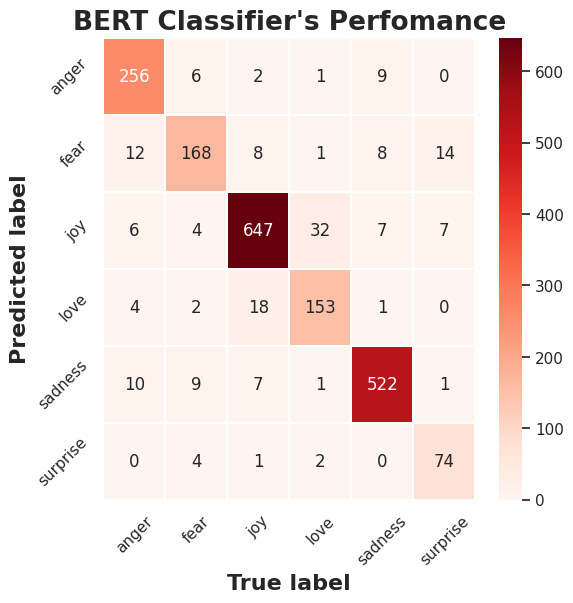

In [99]:
# plot the confussion matrix
draw_confusion_matrix(
    lbl_enc.inverse_transform(Yval2.argmax(axis=1)), 
    lbl_enc.inverse_transform(bert_val_preds.argmax(axis=1)), 
    "BERT Classifier")

In [100]:
compute_summary_perfomance(bert_val_preds.argmax(1), Yval2.argmax(1))

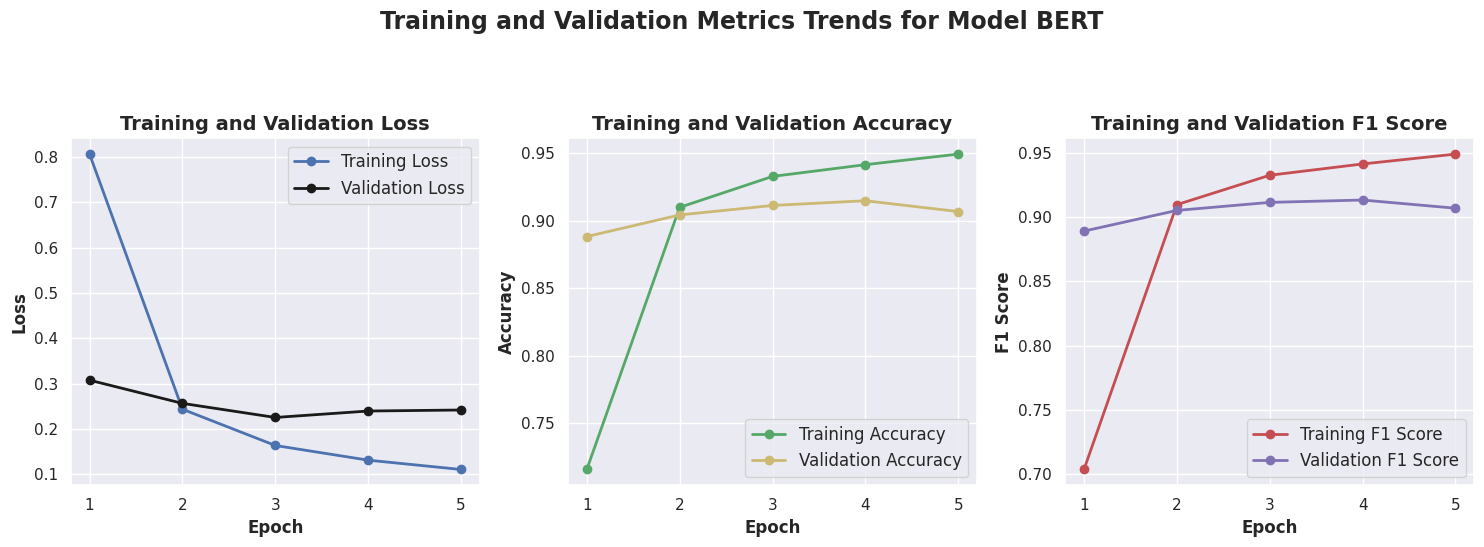

In [101]:
# plot training history
training_history(berthistory.history, "BERT")

### MODEL COMPARISON SUMMARY


- Below are comparison of model perfomances on test data

In [102]:
# get the model prediction probs
xgb_preds_probs = xgb_model.predict_proba(Xtest1)
rf_preds_probs = rf_model.predict_proba(Xtest1)
log_preds_probs = model1.predict_proba(Xtest1)
rnn_preds_probs = model2.predict(Xtest2)
bert_preds_probs = bert_model.predict({
        'input_ids':Xtest3['input_ids'],
        'attention_mask':Xtest3['attention_mask']
})

63/63 [==============================] - 5s 86ms/step


In [103]:
# for comaprison of perfomance
def evaluate_performance(probs, true_vals, model_name):    
    #define data dict to hold the perfomance
    data = {
        'AUC': [],
        'F1': [],
        'Recall': [],
        'Precision': [],
        'Accuracy': [],
        'Error Rate': []}
    # ensure we have same number of preds as model names
    if len(probs) != len(model_name):
        print("An Error Occured")
        return data
    for i, prob in enumerate(probs):
        # calculate auc score
        auc_score = roc_auc_score(true_vals, prob, multi_class='ovo')

        # convert probabilities to binary predictions
        preds = prob.argmax(axis=1)

        # calculate other metrics
        f1 = f1_score(true_vals, preds, average='weighted')
        recall = recall_score(true_vals, preds, average='weighted')
        precision = precision_score(true_vals, preds, average='weighted') 
        accuracy = accuracy_score(true_vals,preds)
        error_rate = 1 - f1

        # create dataframe with metrics
        data['AUC'].append(auc_score)
        data['F1'].append(f1)
        data['Recall'].append(recall)
        data['Precision'].append(precision)
        data['Accuracy'].append(accuracy)
        data['Error Rate'].append(error_rate)

    return data

In [104]:
# convert predicitons to probability
rnn_probs = np.exp(rnn_preds_probs) / np.sum(np.exp(rnn_preds_probs), axis=1, keepdims=True)
bert_probs = np.exp(bert_preds_probs) / np.sum(np.exp(bert_preds_probs), axis=1, keepdims=True)

In [105]:
bert_probs[0], rnn_probs[0]

(array([0.12968144, 0.12962113, 0.12961042, 0.129662  , 0.3518051 ,
        0.12961985], dtype=float32),
 array([0.12920845, 0.13314506, 0.13138837, 0.1291706 , 0.34843037,
        0.12865722], dtype=float32))

In [106]:
final_metrics = pd.DataFrame(
    evaluate_performance(
        [xgb_preds_probs, rf_preds_probs, log_preds_probs, rnn_probs, bert_probs], 
        test.label, 
        ["XGB CLF", "RANDOM FOREST CLF", "LOGISTIC REG", "LSTM(RNN)", "BERT MODEL"]), 
    index=["XGB CLF", "RANDOM FOREST CLF", "LOGISTIC REG", "LSTM(RNN)", "BERT MODEL"])

In [107]:
# check the final metrics
final_metrics

AUC        F1  Recall  Precision  Accuracy  Error Rate
XGB CLF            0.979434  0.864333  0.8640   0.865492    0.8640    0.135667
RANDOM FOREST CLF  0.979981  0.851986  0.8530   0.852492    0.8530    0.148014
LOGISTIC REG       0.977518  0.835242  0.8415   0.841033    0.8415    0.164758
LSTM(RNN)          0.965906  0.896129  0.8945   0.899851    0.8945    0.103871
BERT MODEL         0.986988  0.899622  0.8990   0.901869    0.8990    0.100378

In [108]:
# sort based on the error F1 score
final_metrics.sort_values(by="Error Rate")

AUC        F1  Recall  Precision  Accuracy  Error Rate
BERT MODEL         0.986988  0.899622  0.8990   0.901869    0.8990    0.100378
LSTM(RNN)          0.965906  0.896129  0.8945   0.899851    0.8945    0.103871
XGB CLF            0.979434  0.864333  0.8640   0.865492    0.8640    0.135667
RANDOM FOREST CLF  0.979981  0.851986  0.8530   0.852492    0.8530    0.148014
LOGISTIC REG       0.977518  0.835242  0.8415   0.841033    0.8415    0.164758